In [50]:
%matplotlib inline

import dill
from collections import defaultdict, Counter
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
# import pickle


In [40]:
#read the training files

##english
train_e = 'training/hansards.36.2.e'
test_e = 'testing/test/test.e'
dev_e = 'validation/dev.e'
# train_e = 'training/eng.e'

##french
train_f = 'training/hansards.36.2.f'
test_f = 'testing/test/test.f'
dev_f = 'validation/dev.f'
# train_f = 'training/fra.f'

null = ['0NULL']

with open(train_e) as e:
    sentences_e = [null + l.split() for l in e.readlines()]

with open(test_e) as e:
    for l in e.readlines():
         sentences_e.append(null + l.split())

with open(dev_e) as e:
    for l in e.readlines():
         sentences_e.append(null + l.split())

    
with open(train_f) as f:
    sentences_f = [l.split() for l in f.readlines()]

with open(test_f) as f:
    for l in f.readlines():
         sentences_f.append(l.split())

with open(dev_f) as f:
    for l in f.readlines():
         sentences_f.append(l.split())
    

In [41]:
no_sentences = len(sentences_e)
print(no_sentences)
#print(sentences_e[5])
#sentences_f[5]
#print(sentences_e[456])
# print(sentences_e[231640])
# print(sentences_f[231640])
# print(len(sentences_f))

231648


In [121]:
#IMPORTANT! you don't need to run this cell because you can just load the dill file 'transprobs_init.pickle'

#TRANSLATION PROBABILITY
#important: only create a dictionary of the words that co-occur 

w2i_e = defaultdict(lambda: len(w2i_e)) #word 2 index english corpus
i2w_e = dict() #index 2 word english corpus
# cnt_e = Counter() #counts of words english corpus
    
w2i_f = defaultdict(lambda: len(w2i_f))  #word 2 index french corpus
i2w_f = dict() #index 2 word french corpus
# cnt_f = Counter() #counts of words in french corpus
# co_counts =  defaultdict(lambda: defaultdict(int))

t = defaultdict(lambda: defaultdict(int)) #create dictionary of transition probabilities

#here we create w2i and i2w dictionaries for french and english
for i in range (no_sentences):
    sent_e = sentences_e[i]
    sent_f = sentences_f[i]
    
    for word_e in sent_e:
        i2w_e[w2i_e[word_e.lower()]] = word_e.lower()
    
    for word_f in sent_f:
        i2w_f[w2i_f[word_f.lower()]] = word_f.lower()
    


for i in range (no_sentences):
    sent_e = sentences_e[i]
    sent_f = sentences_f[i]
    
    vocab_size = len(w2i_f)
    for word_e in sent_e:
        for word_f in sent_f:
            #initialize the translation probabilities t(f|e) uniformly
            t[word_f.lower()][word_e.lower()] = 1/vocab_size
            

filename = 'transprobs_init.pickle'           
with open(filename, 'wb') as f:
        dill.dump(t,f)
        
#does it make sense what i did here with the initialization of t?            
#t[word_e.lower()][word_f.lower()] = 1/len(co_counts[word_e.lower()])

#no, because words that co-occur with more words now get a lower trnasition prob 
#than words that co-occur with less words
#so then should it just be 1/all possible words in the french vocabulary? 
#the same for all words?

In [122]:
#w2i_e['bill']
# print('the total number of words is in the English corpus is',len(w2i_e))
print('the total number of words is in the French corpus is',len(w2i_f))

#cnt_e['bill']
#cnt_f.most_common(50)

# co_counts['strenuously']
print('the uniform transition prob is ', t['criminel']['strenuously'])

t['personne']['person']

the total number of words is in the French corpus is 43196
the uniform transition prob is  2.315029169367534e-05


2.315029169367534e-05

In [57]:
with open('transprobs_init.pickle', 'rb') as f:
    t = dill.load(f)

In [7]:
# t['dog']['chien']
# t['person']['personne']

In [13]:
co_occurences = defaultdict(lambda: defaultdict(int)) #this will be a dictionary of co-occurence counts
co_occurences['chien']['dog']

counts_f = defaultdict(int)
counts_f['chien']


0

this is iteration 0
-548334647.425
this is iteration 1
-549049385.263
this is iteration 2
-548969990.222
this is iteration 3
-548936867.037
this is iteration 4
-548900732.164
this is iteration 5
-548883866.09
this is iteration 6
-548853276.59
this is iteration 7
-548831496.156
this is iteration 8
-548817136.661
this is iteration 9
-548806949.596
1 day, 3:06:08.522708


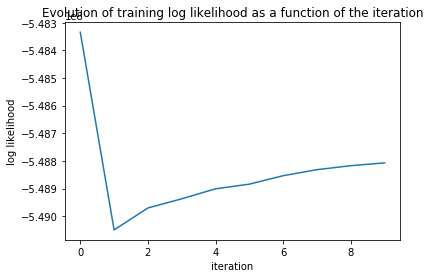

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

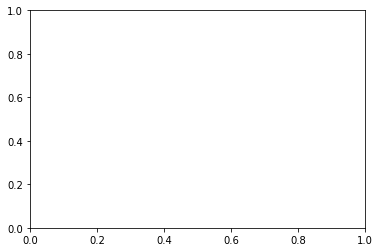

In [59]:
#IBM model 1 with EM training

# for i in range (no_sentences):
#     sent_e = sentences_e[i]
#     sent_f = sentences_f[i]
    
#     vocab_size = len(w2i_f)
#     for word_e in sent_e:
#         for word_f in sent_f:
#             #initialize the translation probabilities t(f|e) uniformly
#             t[word_f.lower()][word_e.lower()] = 1/vocab_size
            
#Here we initialize all counts to 0
co_occurences = defaultdict(lambda: defaultdict(int)) #this will be a dictionary of co-occurence counts
counts_e = defaultdict(int) #this will be a dictionary of individual counts of e
s_total = defaultdict(int)
likelihood_list = []
likelihood_list_w_constant = []

num_iterations = 10

start = datetime.now()

#while not converged 
for k in range(num_iterations):
    print("this is iteration",k)
    co_occurences = defaultdict(lambda: defaultdict(int)) #this will be a dictionary of co-occurence counts
    counts_e = defaultdict(int) #this will be a dictionary of individual counts of e
#     s_total = defaultdict(int)
    
    for sent in range(no_sentences):
        
        sent_e = sentences_e[sent]
        sent_f = sentences_f[sent]
        
        #E-step: compute expected counts
        
        #Compute normalization term (Z or s_total)
        for word_f in sent_f:
            s_total[word_f.lower()] = 0
            for word_e in sent_e:
                s_total[word_f.lower()] += t[word_f.lower()][word_e.lower()]
        
#         #Collect counts
#         for word_e in sent_e:
            for word_f in sent_f:
                #increment count of aligments by expected count
                co_occurences[word_f.lower()][word_e.lower()] += t[word_f.lower()][word_e.lower()] / s_total[word_f.lower()]
                #increment marginal count of French word by expected count
                counts_e[word_e.lower()] += t[word_f.lower()][word_e.lower()] / s_total[word_f.lower()]
    
        #M-step: normalize
        #Estimate probabilities 
        for word_e in sent_e:
            for word_f in sent_f:
                t[word_f.lower()][word_e.lower()] = co_occurences[word_f.lower()][word_e.lower()] / counts_e[word_e.lower()]
                
    #Compute the log likelihood
    likelihood = 0

    for sent in range(no_sentences):

        if sent%10000 == 0:
            print(sent)

        sent_e = sentences_e[sent]
        sent_f = sentences_f[sent]

        l = len(sent_e) #includes null
        m = len(sent_f)

        const = -m * np.log(l)

        sent_likelihood = 0 

        for word_f in sent_f:

            word_likelihood = 0 

            for word_e in sent_e:

                if word_likelihood == 0 or t[word_f.lower()][word_e.lower()] > word_likelihood:

                    word_likelihood = t[word_f.lower()][word_e.lower()]

            sent_likelihood += const + np.log(word_likelihood)

        likelihood += sent_likelihood
    
    print(likelihood)
    likelihood_list.append(likelihood)

    print(datetime.now() - start)

filename = 'transprobs_' + str(k) + '.pickle'                   
with open(filename, 'wb') as f:
    dill.dump(t,f)
        
#plot likelihood results    
iteration= list(range(len(likelihood_list)))

plt.plot(iteration, likelihood_list)
plt.xlabel("iteration")
plt.ylabel('log likelihood')
plt.title('Evolution of training log likelihood as a function of the iteration')
plt.savefig("EM_IBM1.png")
plt.show()



In [131]:
dev_e = 'validation/dev.e'
test_e = 'testing/test/test.e'
dev_f = 'validation/dev.f'
test_f = 'testing/test/test.f'

with open(test_e) as e:
    val_sentences_e = [null + l.split() for l in e.readlines()]
with open(test_f) as f:
    val_sentences_f = [l.split() for l in f.readlines()]

num_val_sentences = len(val_sentences_e)

In [134]:
#Decoding with IBM model 1
#we try to find the most probable alignment given the translation 
#probabilities that were trained with the EM steps
#for each word in a sentence, find highest t

with open('transprobs_0.pickle', 'rb') as f:
    t = dill.load(f)

naaclfile = open("DELETE_val_naacl_IBM1.txt","w") 

for sent in range(num_val_sentences):
    sent_e = val_sentences_e[sent]
    sent_f = val_sentences_f[sent]
    
        
    l = len(sent_e) #includes null
    m = len(sent_f)
    
    for f in range(m):
        best_prob = 0
        best_j = 0
        for e in range(l):
            if t[sent_f[f].lower()][sent_e[e].lower()] > best_prob:
                best_prob = t[sent_f[f].lower()][sent_e[e].lower()]
                best_j = e
        if best_j != 0:
            naaclfile.write(str(sent+1) + " " + str(best_j) + " " + str(f+1) + " S" + "\n")
        print(sent_f[f],sent_e[best_j],f+1,best_j)

naaclfile.close()


2 2 1 1
. . 2 2
2 2 1 1
. . 2 2
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
souvenons remember 1 3
- let 2 1
nous us 3 2
, , 4 4
monsieur Speaker 5 6
le the 6 15
Orateur segments 7 10
, , 8 4
que that 9 8
ce that 10 8
sont these 11 9
ces these 12 9
secteurs segments 13 10
de of 14 11
notre our 15 12
société society 16 13
qui us 17 2
servent segments 18 10
de of 19 11
épine backbone 20 16
dorsale backbone 21 16
à form 22 14
notre our 23 12
économie economy 24 19
. . 25 20
bravo hear 1 1
! ! 2 4
bravo hear 1 1
! ! 2 4
monsieur Speaker 1 2
le the 2 9
Orateur Speaker 3 2
, , 4 3
ma my 5 4
question question 6 5
se question 7 5
adresse question 8 5
à to 9 8
le the 10 9
ministre Minister 11 10
chargé Transport 12 12
de of 13 11
les Transport 14 12
transports Transport 15 12
. . 16 13
tous both 1 1
deux both 2 1
possèdent experience 3 5
de of 4 11
nombreuses many 5 3
années years 6 4
de of 7 11
expérience experience 8 5
dans in 9 

tenir depart 9 15
à at 10 12
le the 11 18
ordre order 12 19
de of 13 20
renvoi reference 14 21
et and 15 10
ne not 16 11
saurait depart 17 15
y depart 18 15
déroger depart 19 15
. . 20 22
je I 1 6
voudrais like 2 8
préciser point 3 5
un a 4 21
autre other 5 4
point point 6 5
, , 7 11
et and 8 12
je I 9 6
le 0NULL 10 0
fais I 11 6
parce so 12 15
que do 13 14
je I 14 6
estime feel 15 18
que do 16 14
il there 17 1
se this 18 19
agit is 19 2
de 0NULL 20 0
un a 21 21
débat debate 22 23
général general 23 22
. . 24 24
en in 1 1
décembre December 2 2
, in 3 1
la be 4 11
Colombie Columbia 5 9
- Columbia 6 9
Britannique British 7 8
a was 8 4
fait that 9 7
savoir CEMA 10 14
que that 11 7
elle be 12 11
allait CEMA 13 14
se that 14 7
retirer withdrawing 15 12
de from 16 13
le 0NULL 17 0
Office CEMA 18 14
canadien CEMA 19 14
de from 20 13
commercialisation CEMA 21 14
de from 22 13
les 0NULL 23 0
oeufs CEMA 24 14
. . 25 15
bien they 1 1
de of 2 18
les have 3 2
députés members 4 11
de of 5 18
tous al

non not 19 19
pas not 20 19
comme as 21 20
un a 22 26
avantage barrier 23 27
, , 24 4
mais but 25 24
comme as 26 20
un a 27 26
obstacle barrier 28 27
. . 29 30
ne not 1 2
nous our 2 7
forcez throats 3 8
pas not 4 2
à . 5 9
accepter moratorium 6 5
un a 7 4
moratoire moratorium 8 5
. . 9 9
ce this 1 1
ne not 2 2
est time 3 5
pas not 4 2
la the 5 3
première first 6 4
fois time 7 5
que that 8 6
les of 9 8
députés members 10 7
en to 11 12
entendront hear 12 13
parler hear 13 13
. . 14 15
on was 1 4
trouvait was 2 4
la the 3 1
même same 4 2
recommandation recommendation 5 3
dans in 6 6
le the 7 1
rapport report 8 8
de of 9 9
le the 10 1
29 29 11 19
avril April 12 18
de of 13 9
le the 14 1
an year 15 22
dernier last 16 21
de of 17 9
le the 18 1
comité Committee 19 12
permanent Standing 20 11
de of 21 9
les of 22 9
privilèges Privileges 23 14
et and 24 15
élections Elections 25 16
. . 26 23
je I 1 4
crois I 2 4
, , 3 3
monsieur Speaker 4 2
le the 5 7
président Speaker 6 2
, , 7 3
que informed 

cadre program 5 13
de of 6 4
ce this 7 12
programme program 8 13
et and 9 17
de of 10 4
ententes RIDA 11 15
auxiliaires subsidiary 12 18
que a 13 1
le 0NULL 14 0
gouvernement federal 15 5
accorde RIDA 16 15
la of 17 4
majeure RIDA 18 15
partie subsidiary 19 18
de of 20 4
son RIDA 21 15
aide assistance 22 6
à for 23 7
le 0NULL 24 0
expansion RIDA 25 15
régionale regional 26 8
. . 27 20
que what 1 1
a did 2 2
fait did 3 2
le the 4 3
gouvernement government 5 4
à the 6 3
ce what 7 1
sujet government 8 4
? ? 9 6
si if 1 4
nous we 2 5
utilisons use 3 6
le the 4 9
chômage unemployment 5 7
pour get 6 16
combattre recovery 7 17
le the 8 9
inflation inflation 9 12
, , 10 13
nous we 11 5
pourrons we 12 5
relancer inflation 13 12
le the 14 9
économie recovery 15 17
, , 16 13
voilà that 17 3
la the 18 9
position recovery 19 17
de the 20 9
le the 21 9
gouvernement get 22 16
. . 23 18
la conservation 1 1
conservation conservation 2 1
commence beginning 3 3
à to 4 4
produire conservation 5 1
de 0NULL

où where 14 9
ces these 15 10
services services 16 11
sont are 17 12
offerts services 18 11
? ? 19 14
ils they 1 1
demandent ask 2 2
à at 3 17
les of 4 5
députés Members 5 4
de of 6 5
le the 7 3
Parlement shops 8 19
de of 9 5
mettre put 10 9
fin end 11 11
à at 12 17
toute all 13 13
réduction cuts 14 14
de of 15 5
personnel personnel 16 16
dans in 17 15
ces these 18 18
ateliers shops 19 19
. . 20 20
ce is 1 2
ne not 2 3
est is 3 2
pas not 4 3
une a 5 4
question question 6 5
de of 7 6
me joining 8 7
joindre joining 9 7
à ahead 10 12
le 0NULL 11 0
député joining 12 7
; ; 13 8
nous we 14 9
avons we 15 9
de of 16 6
le 0NULL 17 0
avance ahead 18 12
sur . 19 13
lui ahead 20 12
. . 21 13
le the 1 23
Dr Dr. 2 6
Kenneth Kenneth 3 7
Hare Hare 4 8
, , 5 9
considéré recognized 6 10
chez Hare 7 8
nous our 8 18
comme as 9 14
le the 10 23
un one 11 16
de of 12 17
nos our 13 18
spécialistes scientists 14 21
les of 15 17
plus atmospheric 16 20
éminents Hare 17 8
de of 18 17
les of 19 17
questions Hare 2

deuxième second 5 5
étape stage 6 6
de of 7 7
réexamen compulsory 8 19
que that 9 9
la Court 10 12
Cour Supreme 11 11
suprême Supreme 12 11
a has 13 13
établi ruled 14 14
que that 15 9
une a 16 16
audience hearing 17 17
est is 18 2
obligatoire compulsory 19 19
. . 20 20
en in 1 5
ce penalize 2 15
qui penalize 3 15
concerne penalize 4 15
les them 5 16
avocats lawyers 6 3
spécialisés specialized 7 4
en in 8 5
immigration immigration 9 6
, , 10 8
le the 11 9
barreau Bar 12 10
se itself 13 13
charge penalize 14 15
de upon 15 12
les them 16 16
pénaliser penalize 17 15
. . 18 17
le the 1 1
autre alternative 2 2
solution alternative 3 2
consiste alternative 4 2
à . 5 11
investir investment 6 7
sous terms 7 4
forme terms 8 4
de of 9 5
prêts loan 10 9
. . 11 11
veut want 1 3
- ? 2 23
il he 3 2
attendre wait 4 5
que wait 5 5
le the 6 7
économie economy 7 8
de of 8 9
ces those 9 10
régions rural 10 11
agricoles acid 11 20
soit before 12 16
complètement completely 13 14
à to 14 4
terre acid 15 20


est . 6 8
de 0NULL 7 0
accord agree 8 5
là that 9 7
- 0NULL 10 0
dessus agree 11 5
. . 12 8
le 0NULL 1 0
poste officer 2 12
de over 3 14
directeur officer 4 12
général officer 5 12
a was 6 7
été was 7 7
vacant permanent 8 9
durant months 9 16
plus over 10 14
de over 11 14
un for 12 13
an 12 13 15
, 0NULL 14 0
et 0NULL 15 0
pour for 16 13
cause for 17 13
. . 18 17
le the 1 1
ministre Minister 2 2
a spoke 3 3
parlé spoke 4 3
de of 5 4
réunions meetings 6 5
, 0NULL 7 0
fort and 8 6
bien . 9 10
. . 10 10
il 's 1 9
fallait had 2 2
que 's 3 9
il 's 4 9
soit that 5 5
à to 6 3
Saint St. 7 7
- St. 8 7
Jean John 9 8
. . 10 10
ce what 1 7
est is 2 2
exactement description 3 5
ce what 4 7
qui happening 5 9
se happening 6 9
passe happening 7 9
. . 8 10
il be 1 3
ne cannot 2 2
est in 3 5
pas cannot 4 2
question isolation 5 6
de 0NULL 6 0
les 0NULL 7 0
traiter treated 8 4
séparément isolation 9 6
. . 10 7
de op 1 9
toute obviously 2 2
évidence obviously 3 2
, in 4 11
il he 5 1
ne not 6 4
aime like 7 

440 440 8 8
millions million 9 9
de the 10 6
dollars $ 11 7
versés paid 12 10
à to 13 5
Canadair Canadair 14 12
en in 15 13
le the 16 6
espace Canadair 17 12
de the 18 6
deux two 19 14
ans years 20 15
. . 21 16
il it 1 5
est became 2 6
ressorti gains 3 14
de from 4 1
ces these 5 2
audiences hearings 6 3
que that 7 8
la the 8 9
grande major 9 10
préoccupation concern 10 11
était was 11 12
les 0NULL 12 0
gains gains 13 14
en gains 14 14
capital gains 15 14
. . 16 15
il it 1 1
donne made 2 12
à to 3 3
entendre indicates 4 2
à to 5 3
les them 6 16
particuliers individual 7 4
que that 8 6
pendant long 9 9
de 0NULL 10 0
trop too 11 8
nombreuses long 12 9
années long 13 9
le 0NULL 14 0
gouvernement Government 15 10
a has 16 11
décidé made 17 12
pour for 18 7
eux them 19 16
. . 20 17
dans that 1 1
ce that 2 1
sens disillusioned 3 18
- 0NULL 4 0
là that 5 1
, , 6 13
je I 7 10
vous I 8 10
dirai brings 9 2
que that 10 1
je I 11 10
ai I 12 10
rencontré met 13 11
dernièrement recently 14 12
de of 1

de of 11 14
faire discriminate 12 8
ce that 13 12
genre sort 14 13
de of 15 14
discrimination discriminate 16 8
entre among 17 9
les among 18 9
gens individuals 19 10
en sort 20 13
fonction basis 21 15
de of 22 14
un a 23 3
pareil discriminate 24 8
critère basis 25 15
. . 26 16
une disease 1 21
collaboration operation 2 9
entre - 3 5
le the 4 14
gouvernement federal 5 4
fédéral federal 6 4
et and 7 16
les of 8 3
provinces provincial 9 6
est is 10 10
indispensable surveillance 11 22
pour required 12 11
accroître increase 13 13
la co 14 7
valeur federal 15 4
et and 16 16
le the 17 14
efficacité efficiency 18 17
de of 19 3
nos our 20 19
programmes systems 21 23
de of 22 3
dépistage surveillance 23 22
. . 24 24
selon that 1 3
lui he 2 1
, time 3 11
il he 4 1
vaudrait better 5 10
mieux better 6 10
attendre better 7 10
à at 8 5
le 0NULL 9 0
moins least 10 6
jusque at 11 5
en would 12 7
juin June 13 4
. . 14 12
le the 1 4
entreprise company 2 5
, , 3 3
tout was 4 6
en in 5 1
demeurant renamed

In [135]:
#Decoding with IBM model 1
#we try to find the most probable alignment given the translation 
#probabilities that were trained with the EM steps
#for each word in a sentence, find highest t

def write_naacl(filename):

    naaclfile = open(filename,"w") 

    for sent in range(num_val_sentences):
        sent_e = val_sentences_e[sent]
        sent_f = val_sentences_f[sent]


        l = len(sent_e) #includes null
        m = len(sent_f)

        for f in range(m):
            best_prob = 0
            best_j = 0
            for e in range(l):
                if t[sent_f[f].lower()][sent_e[e].lower()] > best_prob:
                    best_prob = t[sent_f[f].lower()][sent_e[e].lower()]
                    best_j = e
            if best_j != 0:
                naaclfile.write(str(sent+1) + " " + str(best_j) + " " + str(f+1) + " S" + "\n")
            print(sent_f[f],sent_e[best_j],f+1,best_j)

    naaclfile.close()


In [136]:
for i in range(10):
    filename = 'transprobs_' + str(i) +'.pickle'
    with open(filename, 'rb') as f:
        t = dill.load(f)
    
    writefile = "test_naacl_IBM1_iter" + str(i)+ ".txt"
    write_naacl(writefile)

2 2 1 1
. . 2 2
2 2 1 1
. . 2 2
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
souvenons remember 1 3
- let 2 1
nous us 3 2
, , 4 4
monsieur Speaker 5 6
le the 6 15
Orateur segments 7 10
, , 8 4
que that 9 8
ce that 10 8
sont these 11 9
ces these 12 9
secteurs segments 13 10
de of 14 11
notre our 15 12
société society 16 13
qui us 17 2
servent segments 18 10
de of 19 11
épine backbone 20 16
dorsale backbone 21 16
à form 22 14
notre our 23 12
économie economy 24 19
. . 25 20
bravo hear 1 1
! ! 2 4
bravo hear 1 1
! ! 2 4
monsieur Speaker 1 2
le the 2 9
Orateur Speaker 3 2
, , 4 3
ma my 5 4
question question 6 5
se question 7 5
adresse question 8 5
à to 9 8
le the 10 9
ministre Minister 11 10
chargé Transport 12 12
de of 13 11
les Transport 14 12
transports Transport 15 12
. . 16 13
tous both 1 1
deux both 2 1
possèdent experience 3 5
de of 4 11
nombreuses many 5 3
années years 6 4
de of 7 11
expérience experience 8 5
dans in 9 

par by 11 10
le the 12 4
crime crime 13 12
organisé organized 14 11
dans in 15 13
notre our 16 14
pays country 17 15
, , 18 16
on when 19 1
doit must 20 18
envisager consider 21 19
de of 22 6
les of 23 6
solutions solutions 24 23
en in 25 13
profondeur ravages 26 8
. . 27 24
leur their 1 4
popularité popularity 2 5
a soared 3 6
monté coasted 4 9
en 0NULL 5 0
flèche soared 6 6
et and 7 7
ils they 8 8
ont they 9 8
traversé coasted 10 9
la and 11 7
crise coasted 12 9
avec coasted 13 9
facilité coasted 14 9
grâce through 15 10
à on 16 11
cela that 17 12
. . 18 13
( ( 1 1
2 2 2 2
) ) 3 3
Un A 4 4
comité committee 5 5
doit bound 6 7
se bound 7 7
en by 8 8
tenir depart 9 15
à at 10 12
le the 11 18
ordre order 12 19
de of 13 20
renvoi reference 14 21
et and 15 10
ne not 16 11
saurait depart 17 15
y depart 18 15
déroger depart 19 15
. . 20 22
je I 1 6
voudrais like 2 8
préciser point 3 5
un a 4 21
autre other 5 4
point point 6 5
, , 7 11
et and 8 12
je I 9 6
le 0NULL 10 0
fais I 11 6
parce so 1

je i 2 1
comprends understand 3 2
bien understand 4 2
, least 5 8
on contemplated 6 16
prévoit annum 7 13
un a 8 4
taux rate 9 5
de of 10 6
intérêts annum 11 13
annuel annum 12 13
de of 13 6
70 70 14 9
% annum 15 13
. . 16 17
nous our 1 3
souhaitons hope 2 4
parvenir hope 3 4
à to 4 5
une a 5 7
décision decision 6 8
cette this 7 9
semaine week 8 10
. . 9 11
nous we 1 1
acceptons accept 2 2
votre your 3 3
opinion view 4 4
. . 5 5
il . 1 8
fit fought 2 2
campagne election 3 4
là that 4 6
- 0NULL 5 0
dessus on 6 5
pendant fought 7 2
les 0NULL 8 0
élections election 9 4
. . 10 8
12 12 1 1
. . 2 2
monsieur Speaker 1 2
le 0NULL 2 0
Orateur hoax 3 12
, , 4 3
voici hoax 5 12
ce what 6 9
que that 7 7
je I 8 4
ai I 9 4
à to 10 6
en to 11 6
dire say 12 5
: : 13 8
quelle what 14 9
cruelle cruel 15 11
comédie hoax 16 12
, , 17 3
car because 18 14
ce what 19 9
est is 20 18
jouer hoax 21 12
la is 22 18
comédie hoax 23 12
. . 24 19
monsieur Speaker 1 2
le 0NULL 2 0
Orateur Speaker 3 2
, , 4 3
nous we 

comité Committee 16 15
de from 17 10
action Action 18 14
de from 19 10
les have 20 6
chemins Rail 21 13
de from 22 10
fer Rail 23 13
de from 24 10
les have 25 6
Prairies Prairie 26 12
. . 27 16
( ( 1 1
ii ii 2 2
) ) 3 3
a related 4 16
) ) 5 3
3 Three 6 7
véhicules vehicles 7 8
seront will 8 9
utilisés used 9 11
par by 10 12
6 vehicles 11 8
spécialistes experts 12 15
canadiens Canadian 13 14
dans used 14 11
le the 15 18
cadre assistance 16 22
de of 17 20
la the 18 18
prestation provision 19 19
de of 20 20
aide assistance 21 22
technique technical 22 21
. . 23 23
1979 1979 1 1
. . 2 2
et and 1 1
nous we 2 2
allons will 3 3
appliquer implement 4 4
chacune 's 5 11
de over 6 21
les have 7 17
recommandations recommendation 8 6
contenues 's 9 11
dans in 10 7
le the 11 8
rapport report 12 12
de over 13 21
le the 14 8
Vérificateur Auditor 15 9
général General 16 10
, , 17 13
chose something 18 14
que 's 19 11
nous we 20 2
réclamons calling 21 19
depuis years 22 25
dix ten 23 24
ans years 24 25


les of 14 2
deux two 15 11
prochaines next 16 10
années years 17 12
, , 18 16
soit or 19 17
15 15 20 18
% 2,958 21 15
de of 22 2
le the 23 9
salaire salary 24 26
initial original 25 23
de of 26 2
$ $ 27 14
20,000 2,958 28 15
. . 29 27
de the 1 4
après closed 2 20
les 0NULL 3 0
nouvelles news 4 5
de the 5 4
ce this 6 6
matin morning 7 7
, in 8 3
la the 9 4
mine mine 10 13
de the 11 4
minerai Steele 12 12
de the 13 4
fer Steele 14 12
à this 15 6
Heath Heath 16 10
, in 17 3
dans in 18 3
le Heath 19 10
nord northern 20 15
de the 21 4
le Heath 22 10
Nouveau New 23 16
- - 24 11
Brunswick Brunswick 25 17
va Steele 26 12
fermer closed 27 20
. . 28 22
ils they 1 1
sont are 2 2
prêts ready 3 3
à to 4 4
suivre follow 5 5
cet leadership 6 7
exemple follow 7 5
. . 8 8
a kinds 1 7
le the 2 15
heure moment 3 17
actuelle present 4 16
, going 5 12
un a 6 3
certain number 7 4
nombre number 8 4
de of 9 5
programmes programs 10 9
de of 11 5
ce going 12 12
genre kinds 13 7
fonctionnent programs 14 9
déjà h

de the 3 1
les 0NULL 4 0
répercussions impact 5 2
un pervasive 6 4
peu pervasive 7 4
partout pervasive 8 4
. . 9 5
en in 1 1
de of 2 7
autres other 3 2
mots words 4 3
, , 5 4
les United 6 25
céréaliers grain 7 21
américains United 8 25
toucheront per 9 11
une a 10 5
subvention subsidy 11 6
de of 12 7
environ about 13 8
$ $ 14 9
2 2 15 10
le the 16 16
boisseau bushel 17 12
que from 18 15
leur bushel 19 12
versera bushel 20 12
le the 21 16
gouvernement administration 22 18
de of 23 7
M. bushel 24 12
Reagan Reagan 25 17
. . 26 27
le the 1 1
rapport report 2 3
complet full 3 2
sera will 4 4
déposé report 5 3
de the 6 1
ici . 7 11
le the 8 1
automne fall 9 10
prochain coming 10 6
. . 11 11
si if 1 1
ces these 2 2
règles rules 3 3
étaient were 4 4
appliquées treating 5 13
, , 6 8
est in 7 6
- ? 8 19
ce these 9 2
que would 10 9
nous we 11 10
traiterions treating 12 13
effectivement indeed 13 11
tout everyone 14 14
le the 15 16
monde everyone 16 14
sur in 17 6
le the 18 16
même same 19 17
pied

de of 17 20
le the 18 7
31 31 19 22
mars March 20 21
1984 1984 21 24
. . 22 25
cette that 1 1
décision judgment 2 2
est is 3 3
alors in 4 8
envoyée sent 5 4
à to 6 5
le the 7 6
particulier individual 8 7
en in 9 8
question question 10 9
. . 11 10
tout that 1 1
cela that 2 1
est does 3 2
insensé sense 4 5
. . 5 6
dans in 1 8
ce this 2 11
dossier on 3 10
, , 4 3
monsieur Speaker 5 2
le 0NULL 6 0
Président Speaker 7 2
, , 8 3
de 0NULL 9 0
nombreuses many 10 4
autorités authorities 11 5
se this 12 11
sont involved 13 7
donné in 14 8
la acting 15 9
main authorities 16 5
pour on 17 10
réagir authorities 18 5
immédiatement authorities 19 5
à on 20 10
la acting 21 9
situation emergency 22 12
de 0NULL 23 0
urgence emergency 24 12
. . 25 13
que that 1 8
est happened 2 4
- ? 3 15
il ? 4 15
donc that 5 8
advenu happened 6 4
de the 7 6
les to 8 5
études studies 9 7
qui that 10 8
ont were 11 9
été were 12 9
effectuées conducted 13 10
après after 14 11
cet incident 15 13
incident incident 16 13
? ? 1

instant moment 6 9
. . 7 10
il things 1 17
est do 2 2
inutile bush 3 10
, any 4 11
je i 5 1
crois think 6 4
, any 7 11
de about 8 13
continuer beat 9 7
à to 10 15
tourner bush 11 10
autour around 12 8
de about 13 13
le the 14 9
pot bush 15 10
pour beat 16 7
régler things 17 17
la the 18 9
question about 19 13
. . 20 19
cette that 1 3
façon that 2 3
de of 3 14
procéder helps 4 7
permet resource 5 4
à to 6 10
les Indian 7 8
Indiens Indian 8 8
de of 9 14
participer get 10 11
à to 11 10
le the 12 15
activité impact 13 5
économique piece 14 13
. . 15 17
le the 1 3
un one 2 1
de of 3 2
les of 4 2
grands major 5 4
objectifs objectives 6 5
de of 7 2
les of 8 2
consultations consultations 9 8
est is 10 9
de of 11 2
faire make 12 11
en to 13 10
sorte sure 14 12
que that 15 13
la the 16 3
relance recovery 17 15
profite benefits 18 16
également . 19 18
à to 20 10
tous all 21 17
. . 22 18
je I 1 4
pense think 2 5
, , 3 3
monsieur Speaker 4 2
le the 5 11
Président Speaker 6 2
, , 7 3
que that 8 6
le

- ? 4 10
il ? 5 10
préciser clarify 6 4
les of 7 7
effets effect 8 6
de of 9 7
cette clarify 10 4
réduction reduction 11 9
? ? 12 10
je I 1 4
ne been 2 6
ai I 3 4
parlé describing 4 7
jusque far 5 2
ici far 6 2
que thus 7 1
de of 8 11
les have 9 5
aspects aspects 10 10
géographiques describing 11 7
de of 12 11
ma my 13 12
circonscription constituency 14 13
. . 15 14
nous we 1 1
pensons believe 2 2
que believe 3 2
ils they 4 3
relèveront accept 5 5
le the 6 6
défi challenge 7 7
. . 8 8
le 0NULL 1 0
ministre he 2 2
est is 3 6
- ? 4 8
il he 5 2
en 0NULL 6 0
mesure is 7 6
de 0NULL 8 0
affirmer tell 9 3
que that 10 5
cette that 11 5
mesure is 12 6
est is 13 6
équitable fair 14 7
? ? 15 8
il it 1 1
y a 2 13
a has 3 2
longtemps years 4 4
que it 5 1
nos our 6 8
milieux community 7 10
de of 8 15
affaires business 9 9
ne got 10 11
ont got 11 11
pas Government 12 18
reçu got 13 11
de of 14 15
un a 15 13
gouvernement Government 16 18
un a 17 13
tel such 18 12
vote vote 19 14
de of 20 15
confiance 

décidé when 7 14
comment how 8 12
et and 9 13
quand when 10 14
cette this 11 15
modification change 12 16
devrait should 13 17
se come 14 6
manifester take 15 18
. . 16 20
je i 1 1
ai i 2 1
parlé referred 3 2
tantôt earlier 4 3
de up 5 8
le the 6 5
pari bet 7 6
de up 8 8
le the 9 5
premier Prime 10 11
ministre Minister 11 12
( ( 12 13
M. Mr. 13 14
Mulroney Mulroney 14 15
) ) 15 16
concernant concerning 16 17
le the 17 5
emploi employment 18 18
en concerning 19 17
immigration immigration 20 22
. . 21 23
cependant however 1 1
, , 2 2
le the 3 6
projet Bill 4 23
de of 5 18
loi Bill 6 23
dont before 7 8
nous us 8 9
sommes we 9 3
saisis before 10 8
aujourd' today 11 10
hui today 12 10
ne only 13 11
contient housekeeping 14 19
que only 15 11
deux two 16 12
amendements amendments 17 14
de of 18 18
fond substantive 19 13
et and 20 15
un a 21 16
certain number 22 17
nombre number 23 17
de of 24 18
amendements amendments 25 14
de of 26 18
ordre housekeeping 27 19
administratif housekeeping 28 19

lieu place 18 15
? ? 19 16
monsieur Speaker 1 2
le the 2 13
Président Speaker 3 2
, , 4 3
ces these 5 9
questions questions 6 11
inquisitrices probing 7 10
de from 8 12
le the 9 13
parti Party 10 15
libéral Liberal 11 14
me I 12 4
font these 13 9
toujours always 14 6
sourire probing 15 10
. . 16 27
assurément surely 1 1
, 0NULL 2 0
le the 3 2
député Member 4 4
ne not 5 6
voudrait suggesting 6 7
pas not 7 6
que that 8 8
le the 9 2
on been 10 16
impose taxes 11 11
de the 12 2
les have 13 15
sociétés companies 14 13
qui that 15 8
perdent losing 16 17
de the 17 2
le the 18 2
argent money 19 18
. . 20 19
monsieur Speaker 1 2
le the 2 4
Président Speaker 3 2
, , 4 3
la the 5 4
question question 6 8
de of 7 6
le the 8 4
député Member 9 13
part by 10 10
de of 11 6
une question 12 8
hypothèse premise 13 5
toute is 14 14
gratuite premise 15 5
. . 16 16
combien how 1 1
de of 2 25
personnes people 3 3
sont are 4 4
employées employed 5 5
a contract 6 12
) ) 7 8
directement directly 8 9
ou or 9 10
à

dans in 15 13
notre our 16 14
pays country 17 15
, , 18 16
on when 19 1
doit must 20 18
envisager consider 21 19
de of 22 6
les of 23 6
solutions solutions 24 23
en in 25 13
profondeur ravages 26 8
. . 27 24
leur their 1 4
popularité popularity 2 5
a soared 3 6
monté coasted 4 9
en popularity 5 5
flèche soared 6 6
et and 7 7
ils they 8 8
ont they 9 8
traversé coasted 10 9
la 0NULL 11 0
crise coasted 12 9
avec coasted 13 9
facilité coasted 14 9
grâce through 15 10
à through 16 10
cela that 17 12
. . 18 13
( ( 1 1
2 2 2 2
) ) 3 3
Un A 4 4
comité committee 5 5
doit bound 6 7
se bound 7 7
en by 8 8
tenir depart 9 15
à at 10 12
le the 11 18
ordre order 12 19
de of 13 20
renvoi reference 14 21
et and 15 10
ne not 16 11
saurait depart 17 15
y depart 18 15
déroger depart 19 15
. . 20 22
je I 1 6
voudrais like 2 8
préciser point 3 5
un a 4 21
autre other 5 4
point point 6 5
, , 7 11
et and 8 12
je I 9 6
le 0NULL 10 0
fais do 11 14
parce so 12 15
que do 13 14
je I 14 6
estime feel 15 18
que do 1

, , 7 7
ou or 8 8
ce it 9 23
est do 10 3
à so 11 14
vous you 12 9
de 0NULL 13 0
obtenir get 14 11
le the 15 12
pouvoir power 16 13
nécessaire do 17 3
pour get 18 11
les can 19 17
amener get 20 11
à so 21 14
le the 22 12
faire do 23 3
. . 24 25
on we 1 5
y divergencies 2 13
retrouve divergencies 3 13
en in 4 1
effet divergencies 5 13
toutes all 6 7
les have 7 6
tensions strains 8 9
et and 9 10
toutes all 10 7
les have 11 6
divergences divergencies 12 13
de of 13 14
notre our 14 2
pays country 15 16
. . 16 17
le 0NULL 1 0
hon. Turner 2 5
John John 3 2
N N 4 3
. . 5 4
Turner Turner 6 5
( ( 7 6
ministre Minister 8 7
de of 9 8
les Finance 10 9
Finances Finance 11 9
) ) 12 10
propose moved 13 11
: : 14 12
bien good 1 13
que as 2 1
il there 3 10
me I 4 4
coûte -- 5 23
de 0NULL 6 0
le 0NULL 7 0
admettre admit 8 7
, , 9 9
les governments 10 19
gouvernements governments 11 19
libéraux Liberal 12 18
à to 13 6
le 0NULL 14 0
Canada country 15 22
ont been 16 12
présenté brought 17 15
de 0NULL 18 0
b

aimerait preparations 12 15
voir preparations 13 15
les have 14 10
provinces provinces 15 12
participer involved 16 13
à to 17 9
les have 18 10
préparatifs preparations 19 15
de 0NULL 20 0
les have 21 10
réunions meetings 22 18
. . 23 19
mon my 1 1
collègue friend 2 2
de from 3 3
Toronto Toronto 4 4
dit says 5 5
encore more 6 7
53 53 7 6
ans years 8 8
. . 9 9
de of 1 2
après estimates 2 4
toutes all 3 1
ces those 4 3
estimations estimates 5 4
, in 6 10
le the 7 18
Canada Canada 8 7
sera will 9 8
en in 10 10
bien much 11 11
plus more 12 12
mauvaise trouble 13 13
posture trouble 14 13
par result 15 16
suite result 16 16
de of 17 2
le the 18 18
programme Program 19 21
que than 20 22
il be 21 9
ne than 22 22
le the 23 18
était were 24 24
auparavant before 25 26
. . 26 27
monsieur Mr. 1 1
le 0NULL 2 0
premier Prime 3 2
ministre Minister 4 3
, 0NULL 5 0
en indeed 1 1
fait indeed 2 1
, , 3 2
elle divisiveness 4 7
aura will 5 4
de 0NULL 6 0
les will 7 4
effets effects 8 10
plus more 9 6
destru

, , 11 7
je I 12 8
lui him 13 11
rappellerai remind 14 10
son his 15 13
offre offer 16 14
. . 17 15
a is 1 3
cela so 2 5
, , 3 4
je my 4 1
réponds response 5 2
: , 6 4
ce what 1 6
est is 2 5
ce what 3 6
que what 4 6
je I 5 7
recommande recommend 6 8
à to 7 9
la House 8 11
Chambre House 9 11
de 0NULL 10 0
faire to 11 9
, , 12 2
monsieur Sir 13 3
. . 14 12
je I 1 8
ignore know 2 11
si whether 3 1
cela that 4 2
servira good 5 6
à . 6 12
quelque any 7 5
chose do 8 4
. . 9 12
voilà verifiable 1 18
le the 2 3
principe principle 3 4
dont which 4 5
le the 5 3
Alliance Alliance 6 9
doit must 7 6
se which 8 5
inspirer verifiable 9 18
en in 10 10
cherchant verifiable 11 18
à in 12 10
conclure agreements 13 19
de 0NULL 14 0
les with 15 20
accords agreements 16 19
justes fair 17 16
et and 18 17
vérifiables verifiable 19 18
avec with 20 20
le the 21 3
Union Union 22 23
soviétique Soviet 23 22
. . 24 24
la the 1 3
même same 2 4
réponse answer 3 7
se apply 4 11
applique apply 5 11
à to 6 10
les have 7

ampleur equalization 14 1
considérable considerable 15 6
. . 16 10
les parties 1 12
représentants representatives 2 9
de of 3 6
tous all 4 11
les parties 5 12
partis parties 6 12
se it 7 1
inquiètent concern 8 7
de of 9 6
cette matter 10 5
question matter 11 5
. . 12 13
je i 1 1
tiens advise 2 6
également also 3 3
à to 4 5
signaler advise 5 6
que that 6 9
nous like 7 4
avons caucus 8 21
consulté consultation 9 15
le the 10 7
caucus caucus 11 21
progressiste PC 12 20
conservateur PC 13 20
de of 14 14
le the 15 7
Manitoba Manitoba 16 24
et with 17 16
un a 18 12
certain degree 19 13
nombre advise 20 6
de of 21 14
personnes degree 22 13
de of 23 14
cette that 24 9
province advise 25 6
. . 26 25
la the 1 1
localité town 2 15
gardera favourable 3 23
un a 4 21
bon favourable 5 23
souvenir remembered 6 19
de of 7 13
le the 8 1
personnel personnel 9 6
militaire military 10 5
et and 11 7
de of 12 13
leur their 13 8
famille families 14 9
qui favourable 15 23
ont personnel 16 6
participé played 17

dorénavant percentage 11 6
45 45 12 14
% per 13 15
de of 14 7
tous cent 15 16
ses its 16 8
effectifs percentage 17 6
. . 18 22
À in 1 1
le the 2 2
cours last 3 3
de from 4 18
les provincial 5 5
dernières last 6 3
élections election 7 6
provinciales provincial 8 5
à in 9 1
le the 10 2
Manitoba Manitoba 11 4
, , 12 7
900 900 13 8
personnes mostly 14 17
ont were 15 13
voté voters 16 20
par mostly 17 17
la the 18 2
poste mail 19 9
; mail 20 9
surtout mostly 21 17
de from 22 18
les provincial 23 5
citadins urban 24 19
. . 25 21
alors say 1 6
le 0NULL 2 0
gros sense 3 5
bon sense 4 5
sens sense 5 5
ce what 6 1
est does 7 2
quoi what 8 1
? ? 9 7
les are 1 2
abattoirs abattoirs 2 6
bâtis abattoirs 3 6
selon according 4 8
la regulations 5 11
réglementation regulations 6 11
québécoise Quebec 7 10
ont abattoirs 8 6
de 0NULL 9 0
les are 10 2
normes standards 11 1
plus stricter 12 4
sévères abattoirs 13 6
. . 14 12
les are 1 11
techniciens technicians 2 1
gagnent playwrights 3 8
plus more 4 3
de 0N

de 0NULL 4 0
apprendre glad 5 3
que that 6 6
les corporations 7 8
sociétés corporations 8 8
de 0NULL 9 0
État Crown 10 7
qui that 11 6
ont was 12 2
une a 13 10
valeur value 14 12
commerciale commercial 15 11
mais but 16 13
ne no 17 14
répondent sold 18 21
pas no 19 14
à to 20 4
les corporations 21 8
objectifs purpose 22 18
de 0NULL 23 0
la Crown 24 7
politique policy 25 17
publique public 26 16
soient be 27 20
vendues sold 28 21
. . 29 22
lorsque when 1 10
nous we 2 1
avons we 3 1
préparé considerations 4 5
le the 5 13
budget Budget 6 14
, into 7 8
nous we 8 1
avons we 9 1
pris taken 10 3
cela much 11 7
en into 12 8
considération considerations 13 5
. . 14 15
le the 1 2
premier Prime 2 3
ministre Minister 3 4
respectera commitment 4 9
il ? 5 10
cet commitment 6 9
engagement commitment 7 9
? ? 8 10
le the 1 2
ministre Minister 2 3
pourrait can 3 1
- ? 4 10
il ? 5 10
préciser clarify 6 4
les of 7 7
effets effect 8 6
de of 9 7
cette can 10 1
réduction reduction 11 9
? ? 12 10
je I 1 4
ne 

, as 4 4
comme as 5 4
le the 6 11
ravitaillement Beaufort 7 12
de 0NULL 8 0
le the 9 11
secteur industry 10 17
pétrolier Beaufort 11 12
et and 12 15
gazier Beaufort 13 12
de 0NULL 14 0
la the 15 11
mer Sea 16 13
de 0NULL 17 0
Beaufort Beaufort 18 12
, as 19 4
pourraient Beaufort 20 12
être be 21 19
assurés Beaufort 22 12
par by 23 7
de 0NULL 24 0
autres others 25 22
. . 26 23
malheureusement unfortunately 1 1
ou or 2 2
heureusement fortunately 3 3
, , 4 4
selon success 5 20
le the 6 8
point views 7 7
de 0NULL 8 0
vue views 9 7
de 0NULL 10 0
chacun fortunately 11 3
, , 12 4
ce that 13 11
ministre Minister 14 13
ne not 15 15
a has 16 14
guère fortunately 17 3
obtenu success 18 20
de 0NULL 19 0
succès success 20 20
. . 21 21
toutefois however 1 1
, , 2 2
la the 3 4
présidence Chair 4 5
pourrait could 5 6
peut perhaps 6 3
- perhaps 7 3
être perhaps 8 3
en 0NULL 9 0
terminer dispose 10 7
avec Chair 11 5
la the 12 4
motion Motion 13 9
no No. 14 10
1 1 15 11
. . 16 12
sur on 1 1
la the 2 2
cô

aspects lot 10 4
de of 11 11
cette that 12 12
question question 13 13
. . 14 14
a . 1 2
le 0NULL 2 0
ordre order 3 1
. . 4 2
monsieur Speaker 1 2
le the 2 8
Orateur announcement 3 20
, , 4 3
comme as 5 4
je I 6 5
le the 7 8
ai I 8 5
signalé indicated 9 6
à to 10 7
le the 11 8
chef Leader 12 9
de of 13 10
le the 14 8
opposition Opposition 15 12
, , 16 3
je I 17 5
espère hope 18 16
faire make 19 18
une an 20 19
déclaration announcement 21 20
à to 22 7
ce this 23 22
sujet announcement 24 20
le1er announcement 25 20
novembre November 26 25
. . 27 27
ce quite 1 1
est . 2 3
bien quite 3 1
cela quite 4 1
. . 5 3
ce it 1 1
ne not 2 3
est does 3 2
pas not 4 3
en bring 5 4
isolant isolate 6 10
quelque anybody 7 5
un anybody 8 5
que bring 9 4
on it 10 1
le the 11 13
aide isolate 12 10
à to 13 7
se it 14 1
réadapter isolate 15 10
. . 16 15
il he 1 1
laissait left 2 2
une a 3 3
femme wife 4 4
et and 5 5
une a 6 3
famille family 7 6
. . 8 7
monsieur Mr. 1 7
le the 2 13
président Chairman 3 8
je I 4 

le 0NULL 9 0
temps time 10 9
, , 11 5
de 0NULL 12 0
me i 13 1
asseoir sit 14 12
avec with 15 14
les have 16 8
député prospective 17 26
et and 18 17
de 0NULL 19 0
explorer prospective 20 26
la be 21 3
question matter 22 20
de 0NULL 23 0
façon basis 24 27
productive productive 25 24
. . 26 28
le the 1 2
ministre minister 2 3
prendra take 3 4
il need 4 15
de of 5 12
les will 6 1
mesures action 7 5
pour for 8 16
résoudre placing 9 17
les will 10 1
difficultés difficulties 11 10
, , 12 21
car because 13 11
il need 14 15
est now 15 20
absolument absolute 16 14
nécessaire need 17 15
de of 18 12
passer action 19 5
les will 20 1
commandes placing 21 17
maintenant now 22 20
et and 23 22
non not 24 23
dans take 25 4
quelques some 26 24
mois months 27 25
? ? 28 28
cela it 1 1
encouragera spur 2 3
la the 3 4
construction construction 4 5
de of 5 6
nouvelles new 6 7
embarcations spur 7 3
de of 8 6
pêche fishing 9 8
et and 10 10
la the 11 4
création spur 12 3
de of 13 6
nouvelles new 14 7
conserverie

à continued 13 12
ce it 14 9
niveau continued 15 12
. . 16 13
si if 1 1
je I 2 2
veux want 3 3
obtenir statistics 4 5
de 0NULL 5 0
les will 6 15
chiffres statistics 7 5
sur statistics 8 5
la the 9 19
situation want 10 3
de 0NULL 11 0
le the 12 19
Canada country 13 10
, , 14 12
je I 15 2
ne not 16 16
irai refer 17 17
certainement certainly 18 13
pas not 19 16
consulter refer 20 17
le the 21 19
discours speech 22 20
prononcé speech 23 20
par by 24 22
le the 25 19
premier Prime 26 24
ministre Minister 27 25
. . 28 26
nous we 1 1
avons we 2 1
étudié looked 3 2
tous all 4 4
les of 5 7
aspects implications 6 6
de of 7 7
la the 8 5
question looked 9 2
. . 10 9
mieux Timmins 1 13
vaut Timmins 2 13
sans maybe 3 16
doute maybe 4 16
que because 5 15
je me 6 9
cite quote 7 11
un a 8 5
journaliste Timmins 9 13
de 0NULL 10 0
Timmins Timmins 11 13
qui good 12 6
songeait Timmins 13 13
vraisemblablement Timmins 14 13
à to 15 10
le the 16 20
député member 17 22
. . 18 23
monsieur Speaker 1 2
le the 2 7


exemple follow 7 5
. . 8 8
a kinds 1 7
le the 2 15
heure present 3 16
actuelle present 4 16
, at 5 14
un a 6 3
certain number 7 4
nombre number 8 4
de of 9 5
programmes programs 10 9
de of 11 5
ce going 12 12
genre kinds 13 7
fonctionnent kinds 14 7
déjà have 15 2
et and 16 10
nous we 17 1
prévoyons kinds 18 7
en going 19 12
lancer kinds 20 7
de of 21 5
autres kinds 22 7
. . 23 18
nous we 1 10
devons ourselves 2 14
nous we 3 10
demander ask 4 13
comment why 5 16
il ? 6 24
se ourselves 7 14
fait been 8 22
que that 9 3
cette that 10 3
abondance momentum 11 4
de of 12 2
idées ideas 13 6
et and 14 7
de of 15 2
activité activity 16 8
ne not 17 21
ait has 18 17
pas not 19 21
résolu solved 20 23
le the 21 18
problème problem 22 20
de of 23 2
le the 24 18
développement development 25 19
. have 26 11
je i 1 1
voudrais like 2 3
terminer end 3 5
sur on 4 6
une a 5 7
note note 6 9
positive positive 7 8
, , 8 10
monsieur Speaker 9 12
le 0NULL 10 0
Orateur note 11 9
. . 12 13
je i 1 1
voudrais want 

de of 7 7
les them 8 2
communes disrobe 9 19
a talked 10 10
parlé talked 11 10
de of 12 7
harcèlements disrobe 13 19
sexuels sexual 14 12
, in 15 1
de of 16 7
certaines some 17 15
femmes women 18 16
qui this 19 3
avaient had 20 17
été had 21 17
obligées disrobe 22 19
de of 23 7
se this 24 3
dévêtir disrobe 25 19
pour for 26 22
obtenir disrobe 27 19
un some 28 15
emploi jobs 29 24
. . 30 25
je i 1 1
ne simply 2 3
fais am 3 2
que that 4 9
avertir alerting 5 4
les Members 6 5
députés Members 7 5
de 0NULL 8 0
le 0NULL 9 0
existence alerting 10 4
de 0NULL 11 0
un a 12 7
problème problem 13 8
à to 14 6
cause alerting 15 4
de 0NULL 16 0
ce what 17 14
qui happening 18 17
se happening 19 17
est has 20 15
passé alerting 21 4
. . 22 18
Évidemment course 1 8
, , 2 6
quand doing 3 18
les are 4 17
conservateurs Conservatives 5 2
étaient Conservatives 6 2
dans in 7 4
le the 8 1
opposition Opposition 9 5
, , 10 6
ils they 11 16
tenaient Conservatives 12 2
de of 13 7
les are 14 17
discours what 15 15
q

car because 10 9
les have 11 21
entreprises operations 12 19
que because 13 9
ils they 14 1
auront will 15 2
achetées duplication 16 16
feront duplication 17 16
double duplication 18 16
emploi duplication 19 16
avec have 20 21
de of 21 7
autres other 22 18
que because 23 9
ils they 24 1
ont have 25 21
déjà have 26 21
. . 27 22
ce is 1 2
est is 2 2
à at 3 3
la Court 4 12
deuxième second 5 5
étape stage 6 6
de of 7 7
réexamen compulsory 8 19
que that 9 9
la Court 10 12
Cour Court 11 12
suprême Supreme 12 11
a has 13 13
établi ruled 14 14
que that 15 9
une a 16 16
audience hearing 17 17
est is 18 2
obligatoire compulsory 19 19
. . 20 20
en in 1 5
ce Bar 2 10
qui matters 3 7
concerne penalize 4 15
les them 5 16
avocats lawyers 6 3
spécialisés specialized 7 4
en in 8 5
immigration immigration 9 6
, , 10 8
le the 11 9
barreau Bar 12 10
se itself 13 13
charge penalize 14 15
de 0NULL 15 0
les them 16 16
pénaliser penalize 17 15
. . 18 17
le the 1 1
autre alternative 2 2
solution alternative 3 

. . 16 13
réfléchissons 's 1 2
- let 2 1
y think 3 3
un a 4 8
petit 's 5 2
instant moment 6 9
. . 7 10
il things 1 17
est do 2 2
inutile bush 3 10
, any 4 11
je i 5 1
crois think 6 4
, any 7 11
de about 8 13
continuer bush 9 10
à to 10 15
tourner bush 11 10
autour around 12 8
de about 13 13
le the 14 9
pot bush 15 10
pour to 16 15
régler bush 17 10
la the 18 9
question about 19 13
. . 20 19
cette piece 1 13
façon resource 2 4
de of 3 14
procéder helps 4 7
permet resource 5 4
à to 6 10
les Indian 7 8
Indiens Indian 8 8
de of 9 14
participer piece 10 13
à to 11 10
le the 12 15
activité helps 13 7
économique piece 14 13
. . 15 17
le the 1 3
un one 2 1
de of 3 2
les make 4 11
grands major 5 4
objectifs objectives 6 5
de of 7 2
les make 8 11
consultations consultations 9 8
est is 10 9
de of 11 2
faire make 12 11
en benefits 13 16
sorte sure 14 12
que that 15 13
la the 16 3
relance recovery 17 15
profite recovery 18 15
également recovery 19 15
à to 20 10
tous all 21 17
. . 22 18
je I 1 4
pen

là disillusioned 5 18
, , 6 13
je I 7 10
vous disillusioned 8 18
dirai disillusioned 9 18
que that 10 1
je I 11 10
ai I 12 10
rencontré met 13 11
dernièrement recently 14 12
de of 15 7
les them 16 16
centaines hundreds 17 6
de of 18 7
jeunes young 19 8
Canadiens Canadians 20 9
, , 21 13
et to 22 3
ils them 23 16
ont them 24 16
perdu disillusioned 25 18
beaucoup disillusioned 26 18
de of 27 7
illusions disillusioned 28 18
. . 29 19
ce this 1 1
est is 2 2
pourquoi why 3 3
je I 4 4
ne cannot 5 5
puis borrowing 6 21
appuyer supportive 7 8
la the 8 10
demande request 9 11
de of 10 9
emprunt borrowing 11 21
présentée request 12 11
par by 13 18
le the 14 10
gouvernement Government 15 17
. . 16 22
mon « 1 6
collègue Member 2 3
dit says 3 4
« « 4 6
négligé neglected 5 7
le the 6 1
Québec Quebec 7 8
» » 8 9
, , 9 10
je I 10 12
suis agree 11 13
de 0NULL 12 0
accord agree 13 13
avec agree 14 13
lui « 15 6
aussi « 16 6
. . 17 14
je i 1 1
suis glad 2 3
heureux glad 3 3
de 0NULL 4 0
apprendre glad 5 

de 0NULL 23 0
la the 24 1
commercialisation marketing 25 19
. . 26 21
comment why 1 1
se it 2 3
faisait was 3 2
- ? 4 12
il it 5 3
que that 6 4
le 0NULL 7 0
on it 8 3
me I 9 5
présentait representations 10 11
toutes kind 11 9
ces those 12 8
instances representations 13 11
? ? 14 12
» » 1 1
ce what 2 4
est is 3 3
cela that 4 2
que that 5 2
le the 6 5
actuel present 7 6
premier Prime 8 7
ministre Minister 9 8
avait told 10 9
dit told 11 9
à . 12 14
le the 13 5
ancien former 14 11
premier Prime 15 7
ministre Minister 16 8
. . 17 14
la most 1 1
majorité most 2 1
sont are 3 4
de of 4 2
ailleurs unable 5 5
incapables unable 6 5
de of 7 2
travailler work 8 7
. . 9 8
il ago 1 4
y ago 2 4
a gave 3 11
quelques few 4 2
jours days 5 3
, my 6 5
mon my 7 5
collègue colleague 8 6
de from 9 7
Essex Essex 10 8
- - 11 9
Windsor Windsor 12 10
a gave 13 11
donné gave 14 11
à my 15 5
la House 16 13
Chambre House 17 13
une a 18 1
leçon lesson 19 16
de from 20 7
histoire history 21 15
. . 22 17
voici reads 1

le the 18 2
argent money 19 18
. . 20 19
monsieur Speaker 1 2
le the 2 4
Président Speaker 3 2
, , 4 3
la the 5 4
question question 6 8
de of 7 6
le the 8 4
député Member 9 13
part premise 10 5
de of 11 6
une question 12 8
hypothèse premise 13 5
toute premise 14 5
gratuite premise 15 5
. . 16 16
combien how 1 1
de of 2 25
personnes people 3 3
sont are 4 4
employées employed 5 5
a b 6 14
) ) 7 8
directement directly 8 9
ou or 9 10
à in 10 22
contrat contract 11 12
, , 12 21
b b 13 14
) ) 14 8
à in 15 22
temps time 16 17
plein full 17 16
et and 18 18
à in 19 22
temps time 20 17
partiel employed 21 5
à in 22 22
le the 23 23
Bureau Office 24 24
de of 25 25
le the 26 23
premier Prime 27 27
ministre Minister 28 28
? ? 29 29
les des 1 24
cachets performer 2 6
versés paid 3 3
à to 4 4
chacun each 5 5
étaient were 6 7
conformes performer 7 6
à to 8 4
le the 9 1
rôle role 10 12
joué played 11 13
pendant performer 12 6
le the 13 1
gala gala 14 16
et and 15 17
respectaient performer 16 6
les des 1

East Dartmouth 14 12
( ( 15 16
M. Dartmouth 16 12
Forrestall Forrestall 17 18
) ) 18 19
: : 19 20
quand when 1 1
on when 2 1
a caused 3 9
saisi ravages 4 8
le the 5 4
énormité ravages 6 8
de of 7 6
le the 8 4
ravage ravages 9 8
exercé ravages 10 8
par by 11 10
le the 12 4
crime crime 13 12
organisé organized 14 11
dans in 15 13
notre our 16 14
pays country 17 15
, , 18 16
on when 19 1
doit must 20 18
envisager consider 21 19
de of 22 6
les of 23 6
solutions solutions 24 23
en in 25 13
profondeur ravages 26 8
. . 27 24
leur their 1 4
popularité popularity 2 5
a soared 3 6
monté coasted 4 9
en soared 5 6
flèche soared 6 6
et and 7 7
ils they 8 8
ont they 9 8
traversé coasted 10 9
la through 11 10
crise coasted 12 9
avec coasted 13 9
facilité coasted 14 9
grâce through 15 10
à through 16 10
cela that 17 12
. . 18 13
( ( 1 1
2 2 2 2
) ) 3 3
Un A 4 4
comité committee 5 5
doit bound 6 7
se bound 7 7
en by 8 8
tenir depart 9 15
à at 10 12
le the 11 18
ordre order 12 19
de of 13 20
renvoi refe

de 0NULL 13 0
obtenir get 14 11
le the 15 12
pouvoir power 16 13
nécessaire do 17 3
pour so 18 14
les can 19 17
amener get 20 11
à so 21 14
le the 22 12
faire do 23 3
. . 24 25
on divergencies 1 13
y divergencies 2 13
retrouve divergencies 3 13
en in 4 1
effet divergencies 5 13
toutes all 6 7
les have 7 6
tensions strains 8 9
et and 9 10
toutes all 10 7
les have 11 6
divergences divergencies 12 13
de of 13 14
notre our 14 2
pays country 15 16
. . 16 17
le 0NULL 1 0
hon. Turner 2 5
John John 3 2
N N 4 3
. . 5 4
Turner Turner 6 5
( ( 7 6
ministre Minister 8 7
de of 9 8
les Finance 10 9
Finances Finance 11 9
) ) 12 10
propose moved 13 11
: : 14 12
bien good 1 13
que as 2 1
il there 3 10
me I 4 4
coûte -- 5 23
de 0NULL 6 0
le 0NULL 7 0
admettre admit 8 7
, , 9 9
les governments 10 19
gouvernements governments 11 19
libéraux Liberal 12 18
à to 13 6
le 0NULL 14 0
Canada country 15 22
ont been 16 12
présenté brought 17 15
de 0NULL 18 0
bonnes good 19 13
mesures brought 20 15
législatives legi

coûter construct 11 10
environ about 12 5
45 45 13 7
milliards billion 14 8
de about 15 5
dollars $ 16 6
. . 17 13
signalons reflected 1 5
par in 2 6
ailleurs reflected 3 5
que this 4 7
on reflected 5 5
trouve reflected 6 5
toutes all 7 4
ces these 8 1
lacunes flaws 9 2
dans in 10 6
le 0NULL 11 0
bill flaws 12 2
. . 13 9
a there 1 11
ce this 2 2
stade stage 3 3
de of 4 4
le the 5 5
débat debate 6 6
sur debate 7 6
la the 8 5
résolution resolution 9 9
, , 10 10
mon my 11 17
parti party 12 18
propose proposes 13 19
trois three 14 13
amendements amendments 15 15
précis specific 16 14
. . 17 22
il there 1 6
ne cannot 2 3
peut cannot 3 3
donc means 4 16
pas cannot 5 3
prétendre claim 6 4
avoir claim 7 4
apporté change 8 9
le the 9 1
moindre claim 10 4
changement change 11 9
à in 12 10
le the 13 1
niveau balance 14 12
de of 15 13
le the 16 1
ensemble ways 17 14
. . 18 17
ce this 1 12
est comes 2 10
dans comes 3 10
le 0NULL 4 0
cadre RIDA 5 15
de of 6 4
ce this 7 12
programme program 8 13
et a

de 0NULL 3 0
les are 4 7
établissements institutions 5 14
financiers financial 6 13
très very 7 9
importants factor 8 11
dans in 9 12
le 0NULL 10 0
ouest western 11 16
de 0NULL 12 0
le 0NULL 13 0
Canada Canada 14 17
. . 15 18
le the 1 1
député Member 2 2
de 0NULL 3 0
Cochrane Cochrane 4 4
- - 5 5
Supérieur Superior 6 6
( ( 7 7
M. Penner 8 9
Penner Penner 9 9
) ) 10 10
a said 11 11
dit said 12 11
tout earlier 13 12
à to 14 21
le the 15 1
heure earlier 16 12
que that 17 14
ce tonight 18 13
était Penner 19 9
à to 20 21
le the 21 1
gouvernement Government 22 20
de 0NULL 23 0
libérer Penner 24 9
ses its 25 24
députés Members 26 25
. . 27 26
ce is 1 2
est is 2 2
vrai is 3 2
. . 4 5
que what 1 1
fait available 2 13
- ? 3 14
on centres 4 8
de of 5 2
les are 6 12
femmes women 7 3
qui who 8 4
vivent live 9 5
loin far 10 6
de of 11 2
les are 12 12
centres centres 13 8
où where 14 9
ces these 15 10
services services 16 11
sont are 17 12
offerts services 18 11
? ? 19 14
ils they 1 1
demandent ask 2

clairement clear 9 4
établi promulgated 10 18
que that 11 12
ces these 12 13
règlements regulations 13 14
ne not 14 16
seraient promulgated 15 18
promulgués promulgated 16 18
que that 17 12
dans these 18 13
un a 19 3
an year 20 21
. . 21 22
je i 1 1
estime feel 2 2
que that 3 3
nous we 4 10
ne not 5 12
avons we 6 10
pas not 7 12
les have 8 13
moyens luxury 9 15
de of 10 16
nous we 11 10
payer luxury 12 15
plus continue 13 19
longtemps luxury 14 15
une an 15 5
pareille luxury 16 15
façon Cabinet 17 8
de of 18 16
se feel 19 2
comporter luxury 20 15
à to 21 18
le the 22 14
cabinet Cabinet 23 8
. . 24 20
ce words 1 3
est in 2 1
donc Languages 3 19
dire words 4 3
, , 5 4
monsieur Speaker 6 6
le the 7 8
Président Speaker 8 6
, , 9 4
que in 10 1
le the 11 8
gouvernement Government 12 9
se the 13 8
doit must 14 10
de of 15 14
respecter recommendations 16 13
les of 17 14
recommandations recommendations 18 13
de of 19 14
le the 20 8
Commissaire Commissioner 21 16
à in 22 1
les of 23 14
langues L

de of 8 5
les of 9 5
femmes women 10 9
soient 's 11 10
évalués evaluated 12 14
équitablement fairly 13 13
. . 14 15
nous we 1 1
comptons intend 2 2
poursuivre continue 3 4
ces interested 4 18
discussions discussion 5 6
en with 6 7
tirant range 7 16
parti range 8 16
de of 9 10
les parties 10 19
opinions views 11 12
exprimées wide 12 15
par interested 13 18
de of 14 10
nombreux wide 15 15
groupes wide 16 15
intéressés interested 17 18
. . 18 20
je i 1 1
pense think 2 2
surtout particularly 3 3
à . 4 7
les of 5 4
mères particularly 6 3
célibataires single 7 5
. . 8 7
le the 1 1
ministre Minister 2 2
de of 3 3
le the 4 1
Expansion Expansion 5 6
économique Economic 6 5
régionale Regional 7 4
traite treats 8 7
avec with 9 13
énormément treats 10 7
de of 11 3
justice fairness 12 18
et and 13 19
de of 14 3
honnêteté honesty 15 20
les with 16 13
dossiers matters 17 9
de of 18 3
le the 19 1
Québec Quebec 20 12
. . 21 21
en fact 1 5
fait fact 2 5
, , 3 23
le the 4 17
revenu income 5 9
agricole fa

capital capital 22 14
. . 23 17
cette sources 1 25
initiative sources 2 25
va will 3 2
augmenter increase 4 3
la poverty 5 4
pauvreté poverty 6 4
chez poverty 7 4
les citizens 8 12
personnes people 9 9
les citizens 10 12
plus most 11 7
vulnérables vulnerable 12 8
, , 13 10
les citizens 14 12
personnes people 15 9
âgées senior 16 11
, , 17 10
qui who 18 14
ne not 19 16
pourront able 20 18
pas not 21 16
trouver find 22 23
de of 23 26
autres other 24 24
sources sources 25 25
de of 26 26
revenu income 27 27
. . 28 28
en Jaw 1 3
outre aerobatic 2 14
, , 3 11
sont aerobatic 4 14
stationnés aerobatic 5 14
sur aerobatic 6 14
cette aerobatic 7 14
base CFB 8 1
, , 9 11
les Snowbirds 10 10
Snow aerobatic 11 14
Birds aerobatic 12 14
, , 13 11
le the 14 6
équipe team 15 16
de of 16 8
acrobatie aerobatic 17 14
aérienne aerobatic 18 14
de of 19 8
le the 20 6
Canada Canada 21 12
. . 22 17
notre our 1 1
caucus caucus 2 2
a heard 3 3
entendu heard 4 3
le the 5 4
autre other 6 5
jour day 7 6
le the 8 4
C

exemple example 4 5
de of 5 6
association fine 6 4
fructueuse fine 7 4
entre between 8 11
les of 9 6
gouvernements partnership 10 8
et and 11 13
le 0NULL 12 0
industrie industry 13 14
. . 14 15
monsieur Speaker 1 2
le the 2 9
Président Speaker 3 2
, , 4 3
je my 5 4
ai my 6 4
une directed 7 7
question question 8 5
à to 9 8
poser question 10 5
à to 11 8
le the 12 9
ministre Minister 13 10
de of 14 11
les Transport 15 12
Transports Transport 16 12
. . 17 13
monsieur Speaker 1 2
le 0NULL 2 0
Président Speaker 3 2
, , 4 3
je me 5 5
ne let 6 4
veux let 7 4
pas clear 8 7
que be 9 6
il be 10 6
y clear 11 7
ait clear 12 7
de 0NULL 13 0
malentendu clear 14 7
. . 15 8
À in 1 19
le the 2 2
sein within 3 1
de of 4 4
le the 5 2
gouvernement Government 6 3
de of 7 4
le the 8 2
Canada Canada 9 5
, , 10 6
divers Departments 11 10
ministères Departments 12 10
ont have 13 11
joué actively 14 13
un a 15 7
rôle actively 16 13
actif actively 17 13
et and 18 15
sont involved 19 14
intervenus coordinated 20 2

cette this 2 4
raison inadvisable 3 9
, , 4 5
nous we 5 6
ne inadvisable 6 9
avons we 7 6
pas inadvisable 8 9
cru inadvisable 9 9
bon inadvisable 10 9
de of 11 3
assister attend 12 11
à to 13 10
la the 14 12
réunion meeting 15 13
et and 16 14
en in 17 1
avons we 18 6
informé informed 19 16
le the 20 12
COJO inadvisable 21 9
en in 22 1
conséquence inadvisable 23 9
. . 24 18
monsieur Speaker 1 2
le the 2 4
Orateur inflationary 3 15
, , 4 3
le the 5 4
ministre minister 6 5
a suggested 7 6
laissé suggested 8 6
entendre suggested 9 6
que that 10 7
un a 11 8
programme program 12 11
de 0NULL 13 0
construction building 14 10
plus greater 15 9
considérable inflationary 16 15
peut might 17 12
- might 18 12
être might 19 12
une a 20 8
poussée inflationary 21 15
inflationniste inflationary 22 15
. . 23 17
je i 1 1
ne disagree 2 2
partage advanced 3 6
pas disagree 4 2
le the 5 4
avis disagree 6 2
de 0NULL 7 0
le the 8 4
ministre minister 9 9
. . 10 10
il there 1 1
y there 2 1
a there 3 1
beaucoup l

après after 1 1
tout throughout 2 9
, , 3 3
le the 4 10
énergie energy 5 4
est is 6 5
un an 7 19
bien well 8 17
collectif incentive 9 23
et and 10 13
le the 11 10
gouvernement government 12 15
pourrait might 13 16
fort consider 14 18
bien well 15 17
adopter approach 16 20
une an 17 19
politique approach 18 20
de 0NULL 19 0
encouragement incentive 20 23
comme consider 21 18
celle referred 22 28
dont which 23 25
je I 24 26
ai I 25 26
parlé referred 26 28
. . 27 29
6 6 1 1
. . 2 2
je i 1 1
serai glad 2 4
heureux glad 3 4
, , 4 5
quand when 5 6
nous we 6 7
en basis 7 27
aurons prospective 8 26
le 0NULL 9 0
temps time 10 9
, , 11 5
de 0NULL 12 0
me i 13 1
asseoir sit 14 12
avec with 15 14
les have 16 8
député prospective 17 26
et and 18 17
de 0NULL 19 0
explorer prospective 20 26
la down 21 13
question matter 22 20
de 0NULL 23 0
façon basis 24 27
productive productive 25 24
. . 26 28
le the 1 2
ministre minister 2 3
prendra take 3 4
il need 4 15
de of 5 12
les some 6 24
mesures action 7 5
p

à to 23 4
notre our 24 23
sécurité security 25 24
. . 26 25
pouvez you 1 2
- ? 2 9
vous you 3 2
imaginer 1978 4 8
une a 5 5
telle such 6 4
mesure ban 7 6
en in 8 7
1978 1978 9 8
? ? 10 9
non no 1 1
, , 2 2
monsieur Mr. 3 3
le 0NULL 4 0
président Chairman 5 4
. . 6 5
bien naturally 1 1
entendu naturally 2 1
, , 3 2
le the 4 3
gouvernement government 5 4
tente attempts 6 5
de of 7 19
conclure naturally 8 1
le the 9 3
meilleur best 10 9
marché attempts 11 5
possible possible 12 10
pour for 13 12
les public 14 15
Canadiens Canadian 15 14
en in 16 16
faisant naturally 17 1
une series 18 18
série series 19 18
de of 20 19
négociations negotiations 21 20
. . 22 21
je i 1 1
ajouterais add 2 3
, , 3 4
monsieur Speaker 4 6
le 0NULL 5 0
Orateur add 6 3
, , 7 4
que that 8 8
il it 9 9
faut must 10 10
la be 11 11
maintenir add 12 3
à continued 13 12
ce it 14 9
niveau continued 15 12
. . 16 13
si if 1 1
je I 2 2
veux want 3 3
obtenir stands 4 11
de 0NULL 5 0
les will 6 15
chiffres statistics 7 5
sur s

Nouveau New 23 16
- - 24 11
Brunswick Brunswick 25 17
va Steele 26 12
fermer Steele 27 12
. . 28 22
ils they 1 1
sont are 2 2
prêts ready 3 3
à to 4 4
suivre follow 5 5
cet leadership 6 7
exemple follow 7 5
. . 8 8
a kinds 1 7
le the 2 15
heure moment 3 17
actuelle present 4 16
, at 5 14
un a 6 3
certain number 7 4
nombre number 8 4
de of 9 5
programmes programs 10 9
de of 11 5
ce going 12 12
genre kinds 13 7
fonctionnent kinds 14 7
déjà have 15 2
et and 16 10
nous we 17 1
prévoyons kinds 18 7
en going 19 12
lancer moment 20 17
de of 21 5
autres kinds 22 7
. . 23 18
nous we 1 10
devons ourselves 2 14
nous we 3 10
demander ask 4 13
comment why 5 16
il ? 6 24
se ourselves 7 14
fait been 8 22
que that 9 3
cette that 10 3
abondance momentum 11 4
de of 12 2
idées ideas 13 6
et and 14 7
de of 15 2
activité activity 16 8
ne not 17 21
ait solved 18 23
pas not 19 21
résolu solved 20 23
le the 21 18
problème problem 22 20
de of 23 2
le the 24 18
développement development 25 19
. have 26 11
je i 

se this 24 3
dévêtir disrobe 25 19
pour for 26 22
obtenir disrobe 27 19
un disrobe 28 19
emploi jobs 29 24
. . 30 25
je i 1 1
ne simply 2 3
fais alerting 3 4
que that 4 9
avertir alerting 5 4
les Members 6 5
députés Members 7 5
de 0NULL 8 0
le 0NULL 9 0
existence alerting 10 4
de 0NULL 11 0
un a 12 7
problème problem 13 8
à to 14 6
cause alerting 15 4
de 0NULL 16 0
ce what 17 14
qui happening 18 17
se happening 19 17
est has 20 15
passé alerting 21 4
. . 22 18
Évidemment course 1 8
, , 2 6
quand Conservatives 3 2
les are 4 17
conservateurs Conservatives 5 2
étaient Conservatives 6 2
dans in 7 4
le the 8 1
opposition Opposition 9 5
, , 10 6
ils they 11 16
tenaient Conservatives 12 2
de of 13 7
les are 14 17
discours what 15 15
qui what 16 15
étaient Conservatives 17 2
à to 18 14
le the 19 1
opposé Conservatives 20 2
de of 21 7
leurs they 22 16
actions Conservatives 23 2
de of 24 7
aujourd' now 25 19
hui now 26 19
. . 27 20
en fact 1 4
réalité fact 2 4
, , 3 5
le the 4 7
ministre Ministe

ont have 5 3
acquis equalization 6 1
à through 7 7
le the 8 8
cours years 9 9
de 0NULL 10 0
les have 11 3
ans years 12 9
une through 13 7
ampleur equalization 14 1
considérable considerable 15 6
. . 16 10
les parties 1 12
représentants representatives 2 9
de of 3 6
tous all 4 11
les parties 5 12
partis parties 6 12
se it 7 1
inquiètent concern 8 7
de of 9 6
cette matter 10 5
question matter 11 5
. . 12 13
je i 1 1
tiens advise 2 6
également also 3 3
à to 4 5
signaler advise 5 6
que that 6 9
nous like 7 4
avons caucus 8 21
consulté consultation 9 15
le the 10 7
caucus caucus 11 21
progressiste PC 12 20
conservateur PC 13 20
de of 14 14
le the 15 7
Manitoba Manitoba 16 24
et with 17 16
un a 18 12
certain degree 19 13
nombre advise 20 6
de of 21 14
personnes degree 22 13
de of 23 14
cette that 24 9
province advise 25 6
. . 26 25
la the 1 1
localité town 2 15
gardera favourable 3 23
un a 4 21
bon favourable 5 23
souvenir remembered 6 19
de of 7 13
le the 8 1
personnel personnel 9 6
militai

Canada Canada 22 13
. . 23 14
il be 1 8
incombe responsibility 2 6
à to 3 7
le the 4 1
gouvernement Government 5 3
fédéral federal 6 2
de 0NULL 7 0
jouer policing 8 10
le the 9 1
rôle policing 10 10
de 0NULL 11 0
agent agent 12 11
de 0NULL 13 0
surveillance policing 14 10
. . 15 12
la the 1 5
Société percentage 2 6
veut wants 3 2
que wants 4 2
les workers 5 12
employés workers 6 12
à to 7 3
temps time 8 11
partiel percentage 9 6
constituent force 10 21
dorénavant percentage 11 6
45 45 12 14
% percentage 13 6
de of 14 7
tous percentage 15 6
ses its 16 8
effectifs percentage 17 6
. . 18 22
À in 1 1
le the 2 2
cours last 3 3
de from 4 18
les provincial 5 5
dernières last 6 3
élections election 7 6
provinciales provincial 8 5
à in 9 1
le the 10 2
Manitoba Manitoba 11 4
, , 12 7
900 900 13 8
personnes mostly 14 17
ont were 15 13
voté voters 16 20
par voters 17 20
la the 18 2
poste mostly 19 17
; mail 20 9
surtout mostly 21 17
de from 22 18
les provincial 23 5
citadins urban 24 19
. . 25 21


trop too 11 8
nombreuses indicates 12 2
années long 13 9
le 0NULL 14 0
gouvernement Government 15 10
a has 16 11
décidé made 17 12
pour for 18 7
eux them 19 16
. . 20 17
dans disillusioned 1 18
ce that 2 1
sens disillusioned 3 18
- mind 4 4
là disillusioned 5 18
, , 6 13
je I 7 10
vous disillusioned 8 18
dirai disillusioned 9 18
que that 10 1
je I 11 10
ai I 12 10
rencontré met 13 11
dernièrement recently 14 12
de of 15 7
les them 16 16
centaines hundreds 17 6
de of 18 7
jeunes young 19 8
Canadiens Canadians 20 9
, , 21 13
et , 22 13
ils them 23 16
ont disillusioned 24 18
perdu disillusioned 25 18
beaucoup disillusioned 26 18
de of 27 7
illusions disillusioned 28 18
. . 29 19
ce this 1 1
est is 2 2
pourquoi why 3 3
je I 4 4
ne cannot 5 5
puis borrowing 6 21
appuyer supportive 7 8
la the 8 10
demande request 9 11
de of 10 9
emprunt borrowing 11 21
présentée borrowing 12 21
par by 13 18
le the 14 10
gouvernement Government 15 17
. . 16 22
mon « 1 6
collègue « 2 6
dit says 3 4
« « 4 6
nég

concernant concerning 16 17
le the 17 5
emploi employment 18 18
en by 19 9
immigration immigration 20 22
. . 21 23
cependant however 1 1
, , 2 2
le the 3 6
projet Bill 4 23
de of 5 18
loi Bill 6 23
dont before 7 8
nous we 8 3
sommes we 9 3
saisis before 10 8
aujourd' today 11 10
hui today 12 10
ne only 13 11
contient housekeeping 14 19
que see 15 4
deux two 16 12
amendements amendments 17 14
de of 18 18
fond substantive 19 13
et and 20 15
un a 21 16
certain number 22 17
nombre number 23 17
de of 24 18
amendements amendments 25 14
de of 26 18
ordre housekeeping 27 19
administratif housekeeping 28 19
. . 29 24
il sort 1 13
ne cannot 2 5
nous we 3 1
est that 4 12
pas cannot 5 5
permis discriminate 6 8
en basis 7 15
tant as 8 2
que that 9 12
société society 10 4
de of 11 14
faire discriminate 12 8
ce that 13 12
genre sort 14 13
de of 15 14
discrimination discriminate 16 8
entre among 17 9
les among 18 9
gens individuals 19 10
en basis 20 15
fonction basis 21 15
de of 22 14
un a 23 3
pareil

très overproduction 3 5
bien know 4 2
le the 5 4
problème problem 6 6
de about 7 3
surproduction overproduction 8 5
. . 9 7
2 2 1 1
. . 2 2
2 2 1 1
. . 2 2
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
souvenons remember 1 3
- let 2 1
nous us 3 2
, , 4 4
monsieur Speaker 5 6
le the 6 15
Orateur segments 7 10
, , 8 4
que that 9 8
ce that 10 8
sont these 11 9
ces these 12 9
secteurs segments 13 10
de of 14 11
notre our 15 12
société society 16 13
qui that 17 8
servent segments 18 10
de of 19 11
épine backbone 20 16
dorsale backbone 21 16
à that 22 8
notre our 23 12
économie economy 24 19
. . 25 20
bravo hear 1 1
! ! 2 4
bravo hear 1 1
! ! 2 4
monsieur Speaker 1 2
le the 2 9
Orateur directed 3 7
, , 4 3
ma my 5 4
question question 6 5
se question 7 5
adresse question 8 5
à to 9 8
le the 10 9
ministre Minister 11 10
chargé directed 12 7
de of 13 11
les Transport 14 12
transports Transport 15 12
. . 16 13
tous both 1 1
deux both 

commercialisation CEMA 21 14
de from 22 13
les 0NULL 23 0
oeufs CEMA 24 14
. . 25 15
bien considerable 1 7
de of 2 18
les have 3 2
députés members 4 11
de of 5 18
tous all 6 13
les have 7 2
partis parties 8 14
de of 9 18
ce this 10 16
côté side 11 17
- side 12 17
ci side 13 17
de of 14 18
la House 15 20
Chambre House 16 20
se this 17 16
y have 18 2
sont they 19 1
également also 20 3
fortement considerable 21 7
opposés considerable 22 7
. . 23 21
ce this 1 13
ne not 2 3
est time 3 14
pas not 4 3
de about 5 11
ces those 6 1
lignes lines 7 5
que that 8 6
il be 9 9
faudrait should 10 8
se concerned 11 10
inquiéter concerned 12 10
pour concerned 13 10
le the 14 4
instant lines 15 5
. . 16 15
le the 1 4
député member 2 6
a allowed 3 3
pu supplementaries 4 8
poser supplementaries 5 8
deux two 6 7
questions supplementaries 7 8
supplémentaires supplementaries 8 8
et and 9 9
, in 10 10
en in 11 10
toute supplementaries 12 8
justice fairness 13 11
, in 14 10
je i 15 1
pense think 16 13
que think 

: : 17 9
monsieur Speaker 1 2
le the 2 4
Orateur offer 3 6
, , 4 3
le the 5 4
gouvernement federal 6 5
fédéral federal 7 5
a was 8 7
offert offer 9 6
un a 10 9
programme program 11 13
de 0NULL 12 0
100 100 13 11
millions million 14 12
de 0NULL 15 0
dollars $ 16 10
. . 17 14
dans in 1 1
la most 2 2
plupart most 3 2
de of 4 4
les of 5 4
échantillons samples 6 3
de of 7 4
cette this 8 5
importance size 9 6
, , 10 10
ce this 11 5
est is 12 9
- -- 13 7
à in 14 1
- -- 15 7
dire negligible 16 21
un a 17 11
groupe group 18 12
de of 19 4
plus most 20 2
de of 21 4
500 500 22 15
personnes -- 23 7
, , 24 10
cela negligible 25 21
serait would 26 18
considéré -- 27 7
comme -- 28 7
négligeable -- 29 7
. . 30 22
de 0NULL 1 0
ordinaire borrowing 2 7
pour for 3 4
demander seeking 4 5
de 0NULL 5 0
nouveaux new 6 6
pouvoirs powers 7 8
de 0NULL 8 0
emprunt borrowing 9 7
ou attach 10 11
annexer borrowing 11 7
un a 12 12
article clause 13 13
à to 14 10
les supply 15 15
bills borrowing 16 7
de 0NULL 17 0
fina

partie RIDA 19 15
de of 20 4
son RIDA 21 15
aide assistance 22 6
à for 23 7
le 0NULL 24 0
expansion RIDA 25 15
régionale regional 26 8
. . 27 20
que what 1 1
a did 2 2
fait did 3 2
le the 4 3
gouvernement government 5 4
à the 6 3
ce what 7 1
sujet did 8 2
? ? 9 6
si if 1 4
nous we 2 5
utilisons recovery 3 17
le the 4 9
chômage unemployment 5 7
pour use 6 6
combattre recovery 7 17
le the 8 9
inflation inflation 9 12
, , 10 13
nous we 11 5
pourrons recovery 12 17
relancer inflation 13 12
le the 14 9
économie recovery 15 17
, , 16 13
voilà recovery 17 17
la the 18 9
position recovery 19 17
de 0NULL 20 0
le the 21 9
gouvernement get 22 16
. . 23 18
la conservation 1 1
conservation conservation 2 1
commence beginning 3 3
à to 4 4
produire conservation 5 1
de 0NULL 6 0
le 0NULL 7 0
effet effect 8 7
. . 9 8
on could 1 2
pourrait could 2 2
implanter mill 3 6
une a 4 4
aciérie mill 5 6
en in 6 7
Colombie Columbia 7 9
- Columbia 8 9
Britannique British 9 8
, , 10 10
par example 11 12
exemple exa

. . 12 13
le 0NULL 1 0
Règlement order 2 1
! order 3 1
ces stolen 1 4
créations stolen 2 4
peuvent can 3 2
être be 4 3
volées stolen 5 4
comme as 6 6
ne just 7 5
importe stolen 8 4
quel stolen 9 4
autre other 10 7
type types 11 8
de of 12 9
propriété property 13 10
. . 14 14
deuxièmement second 1 3
, , 2 2
monsieur Speaker 3 6
le 0NULL 4 0
Président Speaker 5 6
, , 6 2
ce what 7 8
que what 8 8
nous we 9 9
avons we 10 9
fait doing 11 12
depuis since 12 13
novembre November 13 15
dernier last 14 14
, , 15 2
ce what 16 8
est is 17 16
une a 18 19
amélioration climate 19 20
de of 20 21
le 0NULL 21 0
climat climate 22 20
de of 23 21
confiance confidence 24 22
. . 25 23
ce that 1 4
sont are 2 7
de 0NULL 3 0
les are 4 7
établissements institutions 5 14
financiers financial 6 13
très very 7 9
importants factor 8 11
dans in 9 12
le 0NULL 10 0
ouest western 11 16
de 0NULL 12 0
le 0NULL 13 0
Canada Canada 14 17
. . 15 18
le the 1 1
député Member 2 2
de 0NULL 3 0
Cochrane Cochrane 4 4
- - 5 5
Supér

le the 2 2
premier Prime 3 3
ministre Minister 4 4
a was 5 8
déclaré negociations 6 12
que that 7 6
il he 8 7
est was 9 8
prêt willing 10 9
à to 11 10
négocier negociations 12 12
encore negociations 13 12
avec with 14 13
le the 15 2
Québec Quebec 16 14
, , 17 15
pourquoi why 18 16
adopter pass 19 24
en in 20 19
vapeur negociations 21 12
ce this 22 25
projet Bill 23 26
de 0NULL 24 0
loi Bill 25 26
? ? 26 27
ce is 1 5
est is 2 5
la the 3 18
raison why 4 6
de of 5 9
ailleurs fact 6 2
pour why 7 6
laquelle vigorously 8 16
certains number 9 8
de of 10 9
mes colleagues 11 11
collègues colleagues 12 11
ont have 13 12
fait fact 14 2
de of 15 9
les have 16 12
interventions spoken 17 13
relativement vigorously 18 16
rigoureuses vigorously 19 16
à in 20 1
ce is 21 5
sujet subject 22 19
. . 23 20
je i 1 1
tiens like 2 3
à to 3 4
exposer notes 4 15
la the 5 7
teneur notes 6 15
précise notes 7 15
de of 8 20
les of 9 20
notes notes 10 15
qui what 11 11
figurent notes 12 15
dans in 13 13
le the 14 7
é

bâtis abattoirs 3 6
selon according 4 8
la regulations 5 11
réglementation regulations 6 11
québécoise abattoirs 7 6
ont abattoirs 8 6
de 0NULL 9 0
les are 10 2
normes standards 11 1
plus stricter 12 4
sévères abattoirs 13 6
. . 14 12
les are 1 11
techniciens technicians 2 1
gagnent playwrights 3 8
plus more 4 3
de 0NULL 5 0
argent playwrights 6 8
que than 7 4
les are 8 11
écrivains writers 9 6
et and 10 7
les are 11 11
auteurs writers 12 6
de 0NULL 13 0
pièces playwrights 14 8
de 0NULL 15 0
théâtre playwrights 16 8
. . 17 14
ils they 1 1
étaient leftists 2 4
tous all 3 3
gauchistes leftists 4 4
. . 5 5
elles well 1 3
sont is 2 2
bien well 3 3
faites done 4 4
. . 5 5
certes yes 1 1
, , 2 2
nous we 3 3
demeurons size 4 15
un a 5 5
petit small 6 6
pays nation 7 7
et and 8 8
nous we 9 3
sommes we 10 3
vulnérables vulnerable 11 11
pour are 12 4
cette size 13 15
raison because 14 12
. . 15 16
m. Wyman 1 2
Wyman Wyman 2 2
compte Wyman 3 2
de of 4 6
nombreuses many 5 4
années years 6 5
de of 

ces these 5 2
audiences hearings 6 3
que that 7 8
la the 8 9
grande major 9 10
préoccupation concern 10 11
était was 11 12
les 0NULL 12 0
gains gains 13 14
en gains 14 14
capital capital 15 13
. . 16 15
il it 1 1
donne indicates 2 2
à to 3 3
entendre indicates 4 2
à to 5 3
les them 6 16
particuliers individual 7 4
que that 8 6
pendant long 9 9
de 0NULL 10 0
trop too 11 8
nombreuses indicates 12 2
années long 13 9
le 0NULL 14 0
gouvernement Government 15 10
a has 16 11
décidé indicates 17 2
pour for 18 7
eux them 19 16
. . 20 17
dans disillusioned 1 18
ce that 2 1
sens disillusioned 3 18
- mind 4 4
là disillusioned 5 18
, , 6 13
je I 7 10
vous disillusioned 8 18
dirai disillusioned 9 18
que that 10 1
je I 11 10
ai I 12 10
rencontré met 13 11
dernièrement recently 14 12
de of 15 7
les them 16 16
centaines hundreds 17 6
de of 18 7
jeunes young 19 8
Canadiens Canadians 20 9
, , 21 13
et , 22 13
ils them 23 16
ont disillusioned 24 18
perdu disillusioned 25 18
beaucoup disillusioned 26 18
de

: : 7 4
il he 1 1
se that 2 3
chauffait burning 3 6
à that 4 3
le 0NULL 5 0
mazout burning 6 6
. . 7 8
le the 1 1
gouvernement Government 2 2
ne yet 3 4
a has 4 3
pas yet 5 4
encore yet 6 4
décidé determining 7 11
comment how 8 12
et and 9 13
quand when 10 14
cette this 11 15
modification change 12 16
devrait should 13 17
se come 14 6
manifester determining 15 11
. . 16 20
je i 1 1
ai i 2 1
parlé referred 3 2
tantôt earlier 4 3
de 0NULL 5 0
le the 6 5
pari bet 7 6
de 0NULL 8 0
le the 9 5
premier Prime 10 11
ministre Minister 11 12
( ( 12 13
M. Mulroney 13 15
Mulroney Mulroney 14 15
) ) 15 16
concernant concerning 16 17
le the 17 5
emploi employment 18 18
en by 19 9
immigration immigration 20 22
. . 21 23
cependant however 1 1
, , 2 2
le the 3 6
projet Bill 4 23
de of 5 18
loi Bill 6 23
dont before 7 8
nous we 8 3
sommes we 9 3
saisis before 10 8
aujourd' today 11 10
hui today 12 10
ne only 13 11
contient housekeeping 14 19
que see 15 4
deux two 16 12
amendements amendments 17 14
de of 

le the 18 2
argent money 19 18
. . 20 19
monsieur Speaker 1 2
le the 2 4
Président Speaker 3 2
, , 4 3
la the 5 4
question question 6 8
de of 7 6
le the 8 4
député Member 9 13
part premise 10 5
de of 11 6
une question 12 8
hypothèse premise 13 5
toute premise 14 5
gratuite premise 15 5
. . 16 16
combien how 1 1
de of 2 25
personnes people 3 3
sont are 4 4
employées employed 5 5
a b 6 14
) ) 7 8
directement directly 8 9
ou or 9 10
à in 10 22
contrat contract 11 12
, , 12 21
b b 13 14
) ) 14 8
à in 15 22
temps time 16 17
plein full 17 16
et and 18 18
à in 19 22
temps time 20 17
partiel employed 21 5
à in 22 22
le the 23 23
Bureau Office 24 24
de of 25 25
le the 26 23
premier Prime 27 27
ministre Minister 28 28
? ? 29 29
les des 1 24
cachets performer 2 6
versés performer 3 6
à to 4 4
chacun each 5 5
étaient were 6 7
conformes performer 7 6
à to 8 4
le the 9 1
rôle role 10 12
joué played 11 13
pendant performer 12 6
le the 13 1
gala gala 14 16
et and 15 17
respectaient performer 16 6
les 

par by 11 10
le the 12 4
crime crime 13 12
organisé organized 14 11
dans in 15 13
notre our 16 14
pays country 17 15
, , 18 16
on realize 19 3
doit must 20 18
envisager consider 21 19
de of 22 6
les of 23 6
solutions solutions 24 23
en in 25 13
profondeur ravages 26 8
. . 27 24
leur their 1 4
popularité popularity 2 5
a soared 3 6
monté coasted 4 9
en soared 5 6
flèche soared 6 6
et and 7 7
ils they 8 8
ont they 9 8
traversé coasted 10 9
la through 11 10
crise coasted 12 9
avec coasted 13 9
facilité coasted 14 9
grâce through 15 10
à through 16 10
cela coasted 17 9
. . 18 13
( ( 1 1
2 2 2 2
) ) 3 3
Un A 4 4
comité committee 5 5
doit bound 6 7
se bound 7 7
en by 8 8
tenir depart 9 15
à at 10 12
le the 11 18
ordre order 12 19
de of 13 20
renvoi reference 14 21
et and 15 10
ne not 16 11
saurait bound 17 7
y depart 18 15
déroger depart 19 15
. . 20 22
je I 1 6
voudrais like 2 8
préciser point 3 5
un a 4 21
autre other 5 4
point point 6 5
, , 7 11
et and 8 12
je I 9 6
le 0NULL 10 0
fais fee

en in 4 1
effet divergencies 5 13
toutes all 6 7
les have 7 6
tensions strains 8 9
et and 9 10
toutes all 10 7
les have 11 6
divergences divergencies 12 13
de of 13 14
notre our 14 2
pays country 15 16
. . 16 17
le 0NULL 1 0
hon. Turner 2 5
John John 3 2
N N 4 3
. . 5 4
Turner Turner 6 5
( ( 7 6
ministre Minister 8 7
de of 9 8
les Finance 10 9
Finances Finance 11 9
) ) 12 10
propose moved 13 11
: : 14 12
bien good 1 13
que as 2 1
il there 3 10
me I 4 4
coûte -- 5 23
de 0NULL 6 0
le 0NULL 7 0
admettre admit 8 7
, , 9 9
les governments 10 19
gouvernements governments 11 19
libéraux Liberal 12 18
à to 13 6
le 0NULL 14 0
Canada country 15 22
ont been 16 12
présenté brought 17 15
de 0NULL 18 0
bonnes good 19 13
mesures -- 20 23
législatives -- 21 23
... -- 22 23
en as 1 1
tant as 2 1
que as 3 1
député member 4 3
de of 5 12
une hard 6 16
circonscription riding 7 7
voisine neighbouring 8 6
, as 9 1
je I 10 8
connais persistence 11 14
fort hard 12 16
bien well 13 10
sa his 14 13
persévérance p

réunions meetings 22 18
. . 23 19
mon my 1 1
collègue friend 2 2
de from 3 3
Toronto Toronto 4 4
dit says 5 5
encore more 6 7
53 53 7 6
ans years 8 8
. . 9 9
de of 1 2
après trouble 2 13
toutes all 3 1
ces those 4 3
estimations estimates 5 4
, be 6 9
le the 7 18
Canada Canada 8 7
sera will 9 8
en in 10 10
bien much 11 11
plus more 12 12
mauvaise trouble 13 13
posture trouble 14 13
par result 15 16
suite result 16 16
de of 17 2
le the 18 18
programme Program 19 21
que than 20 22
il be 21 9
ne than 22 22
le the 23 18
était were 24 24
auparavant before 25 26
. . 26 27
monsieur Mr. 1 1
le 0NULL 2 0
premier Prime 3 2
ministre Minister 4 3
, 0NULL 5 0
en indeed 1 1
fait indeed 2 1
, , 3 2
elle divisiveness 4 7
aura will 5 4
de 0NULL 6 0
les will 7 4
effets effects 8 10
plus more 9 6
destructifs divisiveness 10 7
que than 11 8
positifs positive 12 9
. . 13 11
le 0NULL 1 0
inflation inflation 2 4
mondiale world 3 1
crée dislocation 4 12
de of 5 10
graves severe 6 8
tensions dislocation 7 12
éc

cette that 10 3
abondance momentum 11 4
de of 12 2
idées ideas 13 6
et and 14 7
de of 15 2
activité activity 16 8
ne not 17 21
ait solved 18 23
pas not 19 21
résolu solved 20 23
le the 21 18
problème problem 22 20
de of 23 2
le the 24 18
développement development 25 19
. have 26 11
je i 1 1
voudrais like 2 3
terminer end 3 5
sur on 4 6
une a 5 7
note note 6 9
positive positive 7 8
, , 8 10
monsieur Speaker 9 12
le 0NULL 10 0
Orateur note 11 9
. . 12 13
je i 1 1
voudrais want 2 2
que that 3 11
il it 4 5
soit retail 5 18
bien plain 6 6
clair retail 7 18
, , 8 7
monsieur Speaker 9 9
le the 10 12
Orateur retail 11 18
, , 12 7
que that 13 11
le the 14 12
gouvernement government 15 14
fédéral federal 16 13
ne not 17 16
fixe retail 18 18
pas not 19 16
les set 20 17
prix prices 21 19
de 0NULL 22 0
détail retail 23 18
. . 24 20
la House 1 2
séance p.m. 2 6
est p.m. 3 6
ouverte met 4 3
à at 5 4
2 2 6 5
heures p.m. 7 6
. met 8 3
je i 1 1
rappelle remind 2 2
, in 3 8
monsieur transmission 4 11
le 

est way 7 18
- ? 8 19
ce these 9 2
que be 10 12
nous we 11 10
traiterions treating 12 13
effectivement indeed 13 11
tout everyone 14 14
le the 15 16
monde everyone 16 14
sur place 17 7
le the 18 16
même same 19 17
pied treating 20 13
? ? 21 19
cette this 1 3
éminente disrobe 2 19
autorité disrobe 3 19
à to 4 18
la House 5 9
Chambre House 6 9
de of 7 7
les them 8 2
communes disrobe 9 19
a talked 10 10
parlé talked 11 10
de of 12 7
harcèlements disrobe 13 19
sexuels sexual 14 12
, in 15 1
de of 16 7
certaines some 17 15
femmes women 18 16
qui disrobe 19 19
avaient had 20 17
été disrobe 21 19
obligées disrobe 22 19
de of 23 7
se this 24 3
dévêtir disrobe 25 19
pour for 26 22
obtenir disrobe 27 19
un disrobe 28 19
emploi jobs 29 24
. . 30 25
je i 1 1
ne simply 2 3
fais alerting 3 4
que that 4 9
avertir alerting 5 4
les Members 6 5
députés Members 7 5
de 0NULL 8 0
le 0NULL 9 0
existence alerting 10 4
de 0NULL 11 0
un a 12 7
problème problem 13 8
à to 14 6
cause alerting 15 4
de 0NULL 16 0
c

que that 3 3
nous we 4 10
ne not 5 12
avons we 6 10
pas not 7 12
les have 8 13
moyens luxury 9 15
de of 10 16
nous we 11 10
payer luxury 12 15
plus continue 13 19
longtemps luxury 14 15
une an 15 5
pareille luxury 16 15
façon luxury 17 15
de of 18 16
se feel 19 2
comporter luxury 20 15
à to 21 18
le the 22 14
cabinet Cabinet 23 8
. . 24 20
ce words 1 3
est words 2 3
donc Languages 3 19
dire words 4 3
, , 5 4
monsieur Speaker 6 6
le the 7 8
Président Speaker 8 6
, , 9 4
que in 10 1
le the 11 8
gouvernement Government 12 9
se the 13 8
doit must 14 10
de of 15 14
respecter recommendations 16 13
les of 17 14
recommandations recommendations 18 13
de of 19 14
le the 20 8
Commissaire Commissioner 21 16
à in 22 1
les of 23 14
langues Languages 24 19
officielles Languages 25 19
. . 26 20
ensuite then 1 3
, then 2 3
ils they 3 1
réduiront duplication 4 16
le the 5 5
nombre number 6 6
de of 7 7
les have 8 21
emplois jobs 9 8
car because 10 9
les have 11 21
entreprises operations 12 19
que what 13

surtout particularly 3 3
à . 4 7
les of 5 4
mères particularly 6 3
célibataires parents 7 6
. . 8 7
le the 1 1
ministre Minister 2 2
de of 3 3
le the 4 1
Expansion Expansion 5 6
économique Economic 6 5
régionale Regional 7 4
traite treats 8 7
avec with 9 13
énormément treats 10 7
de of 11 3
justice fairness 12 18
et and 13 19
de of 14 3
honnêteté honesty 15 20
les with 16 13
dossiers matters 17 9
de of 18 3
le the 19 1
Québec Quebec 20 12
. . 21 21
en fact 1 5
fait fact 2 5
, , 3 23
le the 4 17
revenu income 5 9
agricole farm 6 8
net net 7 7
était 1938 8 22
à its 9 11
son its 10 11
plus lowest 11 12
bas lowest 12 12
niveau level 13 13
depuis since 14 14
1970 1970 15 15
et and 16 16
à its 17 11
son its 18 11
troisième third 19 18
plus lowest 20 12
bas lowest 21 12
niveau level 22 13
depuis since 23 14
1938 1938 24 22
, , 25 23
soit matter 26 3
en fact 27 5
45 45 28 25
ans years 29 26
. . 30 28
dans in 1 1
la the 2 2
région area 3 8
de 0NULL 4 0
Laval Laval 5 3
- - 6 4
Deux Deux 7 5
- - 

le 0NULL 8 0
contraire quite 9 7
. . 10 8
je i 1 1
voudrais like 2 3
maintenant now 3 4
vous theory 4 9
parler removal 5 12
un like 6 3
peu removal 7 12
de of 8 13
ce now 9 4
qui behind 10 10
a would 11 2
motivé removal 12 12
la the 13 8
suppression removal 14 12
de of 15 13
le the 16 8
impôt tax 17 16
sur gains 18 15
les into 19 7
gains gains 20 15
en gains 21 15
capital capital 22 14
. . 23 17
cette sources 1 25
initiative sources 2 25
va will 3 2
augmenter increase 4 3
la poverty 5 4
pauvreté poverty 6 4
chez poverty 7 4
les citizens 8 12
personnes vulnerable 9 8
les citizens 10 12
plus most 11 7
vulnérables vulnerable 12 8
, , 13 10
les citizens 14 12
personnes vulnerable 15 8
âgées senior 16 11
, , 17 10
qui who 18 14
ne not 19 16
pourront able 20 18
pas not 21 16
trouver find 22 23
de of 23 26
autres other 24 24
sources sources 25 25
de of 26 26
revenu income 27 27
. . 28 28
en also 1 5
outre aerobatic 2 14
, , 3 11
sont aerobatic 4 14
stationnés aerobatic 5 14
sur aerobatic 6 14

le the 9 11
secteur Beaufort 10 12
pétrolier Beaufort 11 12
et and 12 15
gazier Beaufort 13 12
de 0NULL 14 0
la the 15 11
mer Sea 16 13
de 0NULL 17 0
Beaufort Beaufort 18 12
, be 19 19
pourraient Beaufort 20 12
être be 21 19
assurés Beaufort 22 12
par by 23 7
de 0NULL 24 0
autres others 25 22
. . 26 23
malheureusement unfortunately 1 1
ou or 2 2
heureusement fortunately 3 3
, , 4 4
selon views 5 7
le the 6 8
point views 7 7
de 0NULL 8 0
vue views 9 7
de 0NULL 10 0
chacun fortunately 11 3
, , 12 4
ce that 13 11
ministre Minister 14 13
ne not 15 15
a has 16 14
guère fortunately 17 3
obtenu fortunately 18 3
de 0NULL 19 0
succès success 20 20
. . 21 21
toutefois however 1 1
, , 2 2
la the 3 4
présidence Chair 4 5
pourrait could 5 6
peut perhaps 6 3
- perhaps 7 3
être perhaps 8 3
en could 9 6
terminer dispose 10 7
avec Chair 11 5
la the 12 4
motion Motion 13 9
no No. 14 10
1 1 15 11
. . 16 12
sur on 1 1
la the 2 2
côte coast 3 4
ouest west 4 3
, , 5 13
nous we 6 5
avons we 7 5
le the 8 2
co

. . 24 18
monsieur Speaker 1 2
le the 2 4
Orateur inflationary 3 15
, , 4 3
le the 5 4
ministre minister 6 5
a suggested 7 6
laissé suggested 8 6
entendre suggested 9 6
que that 10 7
un a 11 8
programme program 12 11
de 0NULL 13 0
construction building 14 10
plus greater 15 9
considérable inflationary 16 15
peut might 17 12
- might 18 12
être might 19 12
une a 20 8
poussée inflationary 21 15
inflationniste inflationary 22 15
. . 23 17
je i 1 1
ne disagree 2 2
partage advanced 3 6
pas disagree 4 2
le the 5 4
avis disagree 6 2
de 0NULL 7 0
le the 8 4
ministre minister 9 9
. . 10 10
il there 1 1
y there 2 1
a there 3 1
beaucoup lot 4 4
à to 5 5
dire said 6 7
sur on 7 8
les both 8 9
deux both 9 9
aspects lot 10 4
de of 11 11
cette that 12 12
question question 13 13
. . 14 14
a order 1 1
le 0NULL 2 0
ordre order 3 1
. . 4 2
monsieur Speaker 1 2
le the 2 8
Orateur announcement 3 20
, , 4 3
comme as 5 4
je I 6 5
le the 7 8
ai I 8 5
signalé announcement 9 20
à to 10 7
le the 11 8
chef Leader 1

et and 10 10
la fishing 11 8
création spur 12 3
de of 13 6
nouvelles new 14 7
conserveries spur 15 3
. . 16 18
il there 1 1
y there 2 1
a there 3 1
bien many 4 3
de about 5 8
les are 6 2
choses things 7 4
que say 8 7
je I 9 5
pourrais could 10 6
dire say 11 7
à about 12 8
propos say 13 7
de about 14 8
le 0NULL 15 0
bill 19 16 12
C C 17 10
- - 18 11
19 19 19 12
. . 20 13
je i 1 1
reviendrai later 2 9
sur on 3 10
cet afternoon 4 28
aspect essential 5 18
un a 6 7
peu bit 7 8
plus later 8 9
tard later 9 9
, on 10 10
car because 11 13
je i 12 1
pense think 13 15
que that 14 12
ce this 15 27
est is 16 17
un a 17 7
élément essential 18 18
que that 19 12
il it 20 16
est is 21 17
essentiel essential 22 18
de of 23 22
souligner essential 24 18
cet afternoon 25 28
après afternoon 26 28
- afternoon 27 28
midi afternoon 28 28
. . 29 29
les companies 1 1
sociétés companies 2 1
trouvent find 3 2
que that 4 3
les companies 5 1
règlements cumbersome 6 9
sont are 7 6
compliqués complicated 8 7
, , 9 8
l

prononcé speech 23 20
par by 24 22
le the 25 19
premier Prime 26 24
ministre Minister 27 25
. . 28 26
nous we 1 1
avons we 2 1
étudié looked 3 2
tous all 4 4
les all 5 4
aspects looked 6 2
de of 7 7
la the 8 5
question looked 9 2
. . 10 9
mieux Timmins 1 13
vaut Timmins 2 13
sans Timmins 3 13
doute Timmins 4 13
que because 5 15
je me 6 9
cite quote 7 11
un a 8 5
journaliste Timmins 9 13
de 0NULL 10 0
Timmins Timmins 11 13
qui good 12 6
songeait Timmins 13 13
vraisemblablement Timmins 14 13
à to 15 10
le the 16 20
député member 17 22
. . 18 23
monsieur Speaker 1 2
le the 2 7
Orateur Rail 3 13
, , 4 3
il have 5 6
est have 6 6
vrai Rail 7 13
que have 8 6
je I 9 5
ai I 10 5
reçu Rail 11 13
le the 12 7
rapport report 13 9
de from 14 10
le the 15 7
comité Committee 16 15
de from 17 10
action Action 18 14
de from 19 10
les have 20 6
chemins Rail 21 13
de from 22 10
fer Rail 23 13
de from 24 10
les have 25 6
Prairies Prairie 26 12
. . 27 16
( ( 1 1
ii ii 2 2
) ) 3 3
a used 4 11
) ) 5 3
3 vehic

une A 13 10
piastre 1960s 14 7
est is 15 12
toujours 1960s 16 7
une A 17 10
piastre 1960s 18 7
, , 19 8
et and 20 19
il be 21 21
faut 1960s 22 7
le the 23 6
imposer 1960s 24 7
comme as 25 1
tel 1960s 26 7
. . 27 25
a order 1 1
le 0NULL 2 0
ordre order 3 1
, , 4 2
je please 5 3
vous please 6 3
prie please 7 3
. . 8 4
cela means 1 4
donne 2,958 2 15
en total 3 6
tout all 4 1
une a 5 5
réduction 2,958 6 15
de of 7 2
$ $ 8 14
2,958 2,958 9 15
à over 10 8
le the 11 9
cours 2,958 12 15
de of 13 2
les all 14 1
deux two 15 11
prochaines 2,958 16 15
années years 17 12
, , 18 16
soit 2,958 19 15
15 15 20 18
% 2,958 21 15
de of 22 2
le the 23 9
salaire salary 24 26
initial 2,958 25 15
de of 26 2
$ $ 27 14
20,000 2,958 28 15
. . 29 27
de 0NULL 1 0
après Steele 2 12
les 0NULL 3 0
nouvelles news 4 5
de 0NULL 5 0
ce this 6 6
matin morning 7 7
, in 8 3
la the 9 4
mine mine 10 13
de 0NULL 11 0
minerai Steele 12 12
de 0NULL 13 0
fer Steele 14 12
à in 15 3
Heath Heath 16 10
, in 17 3
dans in 18 3
le the 

de of 11 2
les are 12 12
centres centres 13 8
où where 14 9
ces these 15 10
services services 16 11
sont are 17 12
offerts services 18 11
? ? 19 14
ils they 1 1
demandent ask 2 2
à at 3 17
les Members 4 4
députés Members 5 4
de of 6 5
le the 7 3
Parlement shops 8 19
de of 9 5
mettre put 10 9
fin end 11 11
à at 12 17
toute shops 13 19
réduction cuts 14 14
de of 15 5
personnel personnel 16 16
dans in 17 15
ces these 18 18
ateliers shops 19 19
. . 20 20
ce is 1 2
ne not 2 3
est is 3 2
pas not 4 3
une a 5 4
question question 6 5
de of 7 6
me joining 8 7
joindre joining 9 7
à joining 10 7
le 0NULL 11 0
député joining 12 7
; ; 13 8
nous we 14 9
avons we 15 9
de of 16 6
le 0NULL 17 0
avance ahead 18 12
sur ahead 19 12
lui ahead 20 12
. . 21 13
le the 1 23
Dr Dr. 2 6
Kenneth Kenneth 3 7
Hare Hare 4 8
, , 5 9
considéré Hare 6 8
chez Hare 7 8
nous our 8 18
comme as 9 14
le the 10 23
un an 11 2
de of 12 17
nos our 13 18
spécialistes Hare 14 8
les of 15 17
plus Hare 16 8
éminents Hare 17 8
de of 1

urgence emergency 24 12
. . 25 13
que that 1 8
est happened 2 4
- ? 3 15
il ? 4 15
donc occurred 5 14
advenu happened 6 4
de 0NULL 7 0
les were 8 9
études studies 9 7
qui that 10 8
ont were 11 9
été were 12 9
effectuées studies 13 7
après after 14 11
cet incident 15 13
incident incident 16 13
? ? 17 15
le the 1 7
ex former 2 8
- former 3 8
ministre Minister 4 9
de of 5 10
les Transport 6 11
Transports Transport 7 11
avait was 8 2
clairement clear 9 4
établi promulgated 10 18
que that 11 12
ces these 12 13
règlements regulations 13 14
ne not 14 16
seraient promulgated 15 18
promulgués promulgated 16 18
que that 17 12
dans these 18 13
un a 19 3
an year 20 21
. . 21 22
je i 1 1
estime feel 2 2
que that 3 3
nous we 4 10
ne not 5 12
avons we 6 10
pas not 7 12
les have 8 13
moyens luxury 9 15
de of 10 16
nous we 11 10
payer luxury 12 15
plus continue 13 19
longtemps luxury 14 15
une an 15 5
pareille luxury 16 15
façon luxury 17 15
de of 18 16
se feel 19 2
comporter luxury 20 15
à to 21 18
le

nouveau nine 7 3
gouvernement Government 8 10
a this 9 9
été nine 10 3
porté nine 11 3
à to 12 15
le the 13 6
pouvoir Budget 14 18
, yet 15 14
et and 16 11
nous we 17 12
attendons nine 18 3
toujours yet 19 14
son Budget 20 18
premier since 21 5
budget Budget 22 18
. . 23 19
nous we 1 1
acceptons athletic 2 7
à to 3 9
le the 4 4
heure currently 5 2
actuelle currently 6 2
que that 7 18
soient athletic 8 7
enregistrées registered 9 11
les provincial 10 23
associations associations 11 8
canadiennes Canadian 12 5
de 0NULL 13 0
sport amateur 14 6
amateur amateur 15 6
et and 16 13
il it 17 14
faudrait athletic 18 7
en as 19 25
faire should 20 20
autant athletic 21 7
pour to 22 9
les provincial 23 23
groupes groups 24 24
provinciaux provincial 25 23
. . 26 30
par by 1 6
définition definition 2 7
, but 3 11
« definition 4 7
association association 5 5
canadienne Canadian 6 2
de 0NULL 7 0
sport amateur 8 3
amateur amateur 9 3
» definition 10 7
se includes 11 8
applique athletic 12 4
à includes 1

de 0NULL 15 0
les will 16 2
pensions pension 17 13
entre splitting 18 15
les will 19 2
conjoints survivor 20 5
en benefit 21 6
cas survivor 22 5
de 0NULL 23 0
rupture breakdown 24 18
de 0NULL 25 0
le 0NULL 26 0
mariage marriage 27 17
. . 28 23
en fact 1 2
réalité fact 2 2
, , 3 3
si if 4 4
on if 5 4
tient 2.8 6 25
compte resulting 7 11
de from 8 12
le the 9 13
Accord Accord 10 15
de from 11 12
le the 12 13
Ouest Western 13 14
, , 14 3
il it 15 19
est is 16 20
plutôt 2.8 17 25
probable likely 18 22
que think 19 18
ce is 20 20
sera be 21 24
2.8c 2.8 22 25
. . 23 29
le the 24 13
litre litre 25 28
. . 26 29
nous we 1 1
respectons pledges 2 7
nos our 3 5
promesses pledges 4 7
électorales pledges 5 7
. . 6 8
nous we 1 1
devons must 2 2
remonter revive 3 3
le 0NULL 4 0
économie economy 5 5
, , 6 6
créer create 7 7
de 0NULL 8 0
le 0NULL 9 0
emploi jobs 10 8
, , 11 6
rationaliser rationalize 12 10
les spending 13 12
dépenses spending 14 12
de 0NULL 15 0
le 0NULL 16 0
État revive 17 3
, , 18 6
a

quelques few 4 2
jours days 5 3
, my 6 5
mon my 7 5
collègue colleague 8 6
de from 9 7
Essex Essex 10 8
- - 11 9
Windsor Windsor 12 10
a gave 13 11
donné gave 14 11
à my 15 5
la House 16 13
Chambre House 17 13
une a 18 1
leçon lesson 19 16
de from 20 7
histoire history 21 15
. . 22 17
voici reads 1 3
le the 2 1
texte reads 3 3
de 0NULL 4 0
le the 5 1
article article 6 2
: : 7 4
il he 1 1
se that 2 3
chauffait burning 3 6
à that 4 3
le 0NULL 5 0
mazout burning 6 6
. . 7 8
le the 1 1
gouvernement Government 2 2
ne yet 3 4
a has 4 3
pas yet 5 4
encore yet 6 4
décidé determining 7 11
comment how 8 12
et and 9 13
quand when 10 14
cette this 11 15
modification change 12 16
devrait should 13 17
se come 14 6
manifester determining 15 11
. . 16 20
je i 1 1
ai i 2 1
parlé referred 3 2
tantôt earlier 4 3
de 0NULL 5 0
le the 6 5
pari bet 7 6
de 0NULL 8 0
le the 9 5
premier Prime 10 11
ministre Minister 11 12
( ( 12 13
M. Mulroney 13 15
Mulroney Mulroney 14 15
) ) 15 16
concernant concerning 16 17


sociétés companies 14 13
qui that 15 8
perdent losing 16 17
de 0NULL 17 0
le the 18 2
argent money 19 18
. . 20 19
monsieur Speaker 1 2
le the 2 4
Président Speaker 3 2
, , 4 3
la the 5 4
question question 6 8
de of 7 6
le the 8 4
député Member 9 13
part premise 10 5
de of 11 6
une question 12 8
hypothèse premise 13 5
toute premise 14 5
gratuite premise 15 5
. . 16 16
combien how 1 1
de of 2 25
personnes people 3 3
sont are 4 4
employées employed 5 5
a b 6 14
) ) 7 8
directement directly 8 9
ou or 9 10
à in 10 22
contrat contract 11 12
, , 12 21
b b 13 14
) ) 14 8
à in 15 22
temps time 16 17
plein full 17 16
et and 18 18
à in 19 22
temps time 20 17
partiel contract 21 12
à in 22 22
le the 23 23
Bureau Office 24 24
de of 25 25
le the 26 23
premier Prime 27 27
ministre Minister 28 28
? ? 29 29
les des 1 24
cachets performer 2 6
versés performer 3 6
à to 4 4
chacun each 5 5
étaient were 6 7
conformes performer 7 6
à to 8 4
le the 9 1
rôle role 10 12
joué played 11 13
pendant performer 12 

bravo hear 1 1
! ! 2 4
je i 1 1
proposerais Dartmouth 2 12
donc therefore 3 3
, , 4 5
avec seconded 5 6
le the 6 8
appui seconded 7 6
de 0NULL 8 0
le the 9 8
député member 10 10
de 0NULL 11 0
Halifax Halifax 12 14
- - 13 13
East Dartmouth 14 12
( ( 15 16
M. Dartmouth 16 12
Forrestall Forrestall 17 18
) ) 18 19
: : 19 20
quand when 1 1
on realize 2 3
a caused 3 9
saisi ravages 4 8
le the 5 4
énormité ravages 6 8
de of 7 6
le the 8 4
ravage ravages 9 8
exercé ravages 10 8
par by 11 10
le the 12 4
crime crime 13 12
organisé organized 14 11
dans in 15 13
notre our 16 14
pays country 17 15
, , 18 16
on realize 19 3
doit must 20 18
envisager consider 21 19
de of 22 6
les of 23 6
solutions solutions 24 23
en in 25 13
profondeur ravages 26 8
. . 27 24
leur their 1 4
popularité popularity 2 5
a soared 3 6
monté coasted 4 9
en soared 5 6
flèche soared 6 6
et and 7 7
ils they 8 8
ont they 9 8
traversé coasted 10 9
la through 11 10
crise coasted 12 9
avec coasted 13 9
facilité coasted 14 9
grâce t

part hand 9 11
et and 10 13
être be 11 5
assuré answered 12 16
de 0NULL 13 0
si so 14 3
peu little 15 15
de 0NULL 16 0
le the 17 9
autre other 18 19
? ? 19 20
peut perhaps 1 5
- perhaps 2 5
être perhaps 3 5
proposera censorship 4 22
il he 5 6
ensuite censorship 6 22
une a 7 2
mesure legislation 8 11
nouvelle censorship 9 22
et , 10 4
différente different 11 10
qui which 12 12
ne not 13 14
le the 14 19
exposera censorship 15 22
pas not 16 14
à to 17 18
les will 18 7
accusations charge 19 20
de of 20 21
censure censorship 21 22
. . 22 23
ou or 1 8
ils they 2 2
font they 3 2
leur their 4 4
travail job 5 5
convenablement properly 6 6
, , 7 7
ou or 8 8
ce it 9 23
est do 10 3
à so 11 14
vous you 12 9
de 0NULL 13 0
obtenir get 14 11
le the 15 12
pouvoir power 16 13
nécessaire do 17 3
pour so 18 14
les can 19 17
amener get 20 11
à so 21 14
le the 22 12
faire do 23 3
. . 24 25
on divergencies 1 13
y divergencies 2 13
retrouve divergencies 3 13
en in 4 1
effet divergencies 5 13
toutes all 6 7
le

suite result 16 16
de of 17 2
le the 18 18
programme Program 19 21
que than 20 22
il be 21 9
ne than 22 22
le the 23 18
était were 24 24
auparavant before 25 26
. . 26 27
monsieur Mr. 1 1
le 0NULL 2 0
premier Prime 3 2
ministre Minister 4 3
, 0NULL 5 0
en indeed 1 1
fait indeed 2 1
, , 3 2
elle divisiveness 4 7
aura will 5 4
de 0NULL 6 0
les will 7 4
effets effects 8 10
plus more 9 6
destructifs divisiveness 10 7
que than 11 8
positifs positive 12 9
. . 13 11
le 0NULL 1 0
inflation inflation 2 4
mondiale world 3 1
crée dislocation 4 12
de of 5 10
graves severe 6 8
tensions dislocation 7 12
économiques economic 8 11
. . 9 13
le the 1 1
PT7 PT7 2 2
représente represents 3 3
le the 4 1
début beginning 5 5
de of 6 6
une a 7 7
nouvelle new 8 8
famille family 9 9
de of 10 6
moteurs engines 11 11
dans in 12 12
un a 13 7
niveau PT7 14 2
de of 15 6
puissance PT7 16 2
au above 17 16
- above 18 16
dessus above 19 16
de of 20 6
le the 21 1
moteur engine 22 23
PT6 PT7 23 2
qui highly 24 20
est repr

faire to 11 9
, , 12 2
monsieur Sir 13 3
. . 14 12
je I 1 8
ignore know 2 11
si whether 3 1
cela that 4 2
servira good 5 6
à will 6 3
quelque any 7 5
chose do 8 4
. . 9 12
voilà verifiable 1 18
le the 2 3
principe principle 3 4
dont which 4 5
le the 5 3
Alliance Alliance 6 9
doit must 7 6
se Alliance 8 9
inspirer verifiable 9 18
en in 10 10
cherchant verifiable 11 18
à in 12 10
conclure verifiable 13 18
de 0NULL 14 0
les with 15 20
accords agreements 16 19
justes verifiable 17 18
et and 18 17
vérifiables verifiable 19 18
avec with 20 20
le the 21 3
Union Union 22 23
soviétique Soviet 23 22
. . 24 24
la the 1 3
même same 2 4
réponse answer 3 7
se apply 4 11
applique apply 5 11
à to 6 10
les have 7 9
automobiles automobiles 8 16
. . 9 17
il they 1 1
a bringing 2 3
saisi bringing 3 3
la House 4 6
Chambre House 5 6
de 0NULL 6 0
un a 7 7
projet Bill 8 8
de 0NULL 9 0
loi Bill 10 8
qui those 11 12
aura will 12 10
pour will 13 10
effet liberties 14 13
de 0NULL 15 0
les are 16 2
restreindre res

Mecque mecca 8 6
de 0NULL 9 0
le 0NULL 10 0
tourisme tourist 11 5
à is 12 3
le 0NULL 13 0
Canada mecca 14 6
. . 15 7
la refunded 1 9
taxe refunded 2 9
ne not 3 4
serait refunded 4 9
pas not 5 4
prélevée refunded 6 9
pour refunded 7 9
être be 8 5
remboursée refunded 9 9
par refunded 10 9
la refunded 11 9
suite refunded 12 9
. . 13 10
on been 1 3
se if 2 20
est has 3 2
déjà past 4 8
engagé commitment 5 5
à at 6 15
faire go 7 14
en in 8 6
sorte historic 9 18
que that 10 9
leur their 11 10
taux rate 12 12
de 0NULL 13 0
participation participation 14 11
se if 15 20
accroisse historic 16 18
de 0NULL 17 0
manière traditional 18 22
à at 19 15
atteindre historic 20 18
à at 21 15
le the 22 7
moins least 23 16
les levels 24 19
niveaux levels 25 19
historiques historic 26 18
sinon if 27 20
traditionnels traditional 28 22
. . 29 24
ce is 1 2
est is 2 2
- may 3 13
à at 4 6
- may 5 13
dire say 6 4
à at 7 6
la the 8 7
demande request 9 8
de of 10 9
la the 11 7
personne person 12 11
qui who 13 12
va go

le the 6 6
nouveau nine 7 3
gouvernement Government 8 10
a this 9 9
été nine 10 3
porté nine 11 3
à to 12 15
le the 13 6
pouvoir Budget 14 18
, since 15 5
et and 16 11
nous we 17 12
attendons nine 18 3
toujours yet 19 14
son Budget 20 18
premier since 21 5
budget Budget 22 18
. . 23 19
nous we 1 1
acceptons athletic 2 7
à to 3 9
le the 4 4
heure currently 5 2
actuelle currently 6 2
que that 7 18
soient athletic 8 7
enregistrées registered 9 11
les provincial 10 23
associations associations 11 8
canadiennes Canadian 12 5
de 0NULL 13 0
sport amateur 14 6
amateur amateur 15 6
et and 16 13
il it 17 14
faudrait athletic 18 7
en as 19 25
faire should 20 20
autant athletic 21 7
pour to 22 9
les provincial 23 23
groupes groups 24 24
provinciaux provincial 25 23
. . 26 30
par by 1 6
définition definition 2 7
, but 3 11
« definition 4 7
association association 5 5
canadienne Canadian 6 2
de 0NULL 7 0
sport amateur 8 3
amateur amateur 9 3
» definition 10 7
se includes 11 8
applique athletic 12 4


, , 22 11
le the 23 20
essence gas 24 15
et and 25 7
le the 26 20
chauffage heating 27 19
domestique shampoo 28 6
. . 29 22
cette this 1 1
technique technique 2 2
ne not 3 4
a technique 4 2
rien technique 5 2
de of 6 9
anormal technique 7 2
. . 8 11
de 0NULL 1 0
après 1984 2 13
le the 3 4
dernier last 4 5
budget Budget 5 7
libéral Liberal 6 6
, , 7 2
de 0NULL 8 0
autre 1984 9 13
part 1984 10 13
, , 11 2
le the 12 4
revenu income 13 10
personnel personal 14 9
avait 1984 15 13
augmenté increased 16 11
de 0NULL 17 0
7 7 18 15
% 1984 19 13
en under 20 3
1984 1984 21 13
. . 22 18
le the 1 2
gouvernement Government 2 3
dépense bailing 3 12
largement bailing 4 12
et and 5 9
renfloue bailing 6 12
les corporations 7 14
entreprises corporations 8 14
. . 9 15
les will 1 2
femmes women 2 9
profiteront benefit 3 6
de 0NULL 4 0
nouveaux survivor 5 5
règlements regulations 6 7
concernant splitting 7 15
les will 8 2
prestations benefit 9 6
de 0NULL 10 0
survivant survivor 11 5
et and 12 20
le 0NULL 13

deuxièmement second 1 1
, , 2 2
il investment 3 13
faut advancement 4 16
aider assist 5 6
les businesses 6 8
entreprises businesses 7 8
canadiennes Canadian 8 7
à to 9 5
tirer exploit 10 10
parti technological 11 15
de 0NULL 12 0
les businesses 13 8
possibilités opportunities 14 11
de 0NULL 15 0
investissement investment 16 13
et and 17 14
de 0NULL 18 0
le 0NULL 19 0
développement exploit 20 10
technologique technological 21 15
. . 22 17
non only 1 2
seulement only 2 2
les are 3 3
risques risks 4 5
sont are 5 3
plus greater 6 6
élevés lengthy 7 19
, re 8 15
mais but 9 7
le the 10 4
temps time 11 9
nécessaire required 12 10
pour for 13 13
préparer prepare 14 12
le the 15 4
réapprovisionnement lengthy 16 19
par required 17 10
navire lengthy 18 19
est is 19 18
long lengthy 20 19
. . 21 20
monsieur Speaker 1 2
le the 2 6
Président Speaker 3 2
, , 4 3
une once 5 4
fois once 6 4
encore again 7 5
, , 8 3
les have 9 16
prévisions gloom 10 15
pessimistes forecasters 11 10
de of 12 11
les have 1

monsieur Speaker 1 2
le the 2 8
Président Speaker 3 2
, , 4 3
je I 5 4
suis am 6 5
heureuse pleased 7 6
que that 8 7
le the 9 8
premier Prime 10 9
ministre Minister 11 10
ait pleased 12 6
fourni provided 13 12
ces information 14 14
informations information 15 14
à in 16 15
la House 17 17
Chambre House 18 17
. . 19 18
je I 1 2
prie displays 2 13
donc therefore 3 3
le the 4 5
député Member 5 7
de from 6 10
cesser displays 7 13
de from 8 10
montrer displays 9 13
quoi displays 10 13
que any 11 11
ce any 12 11
soit any 13 11
. . 14 14
pourquoi why 1 1
le the 2 3
premier Prime 3 4
ministre Minister 4 5
se disregard 5 9
est did 6 2
- ? 7 16
il his 8 10
montré disregard 9 9
prêt prepared 10 7
à to 11 8
manquer disregard 12 9
à to 13 8
sa his 14 10
promesse promise 15 11
en in 16 12
premier Prime 17 4
lieu place 18 15
? ? 19 16
monsieur Speaker 1 2
le the 2 13
Président Speaker 3 2
, , 4 3
ces these 5 9
questions questions 6 11
inquisitrices probing 7 10
de from 8 12
le the 9 13
parti Party 10 

le the 11 18
ordre order 12 19
de of 13 20
renvoi reference 14 21
et and 15 10
ne not 16 11
saurait bound 17 7
y depart 18 15
déroger depart 19 15
. . 20 22
je I 1 6
voudrais like 2 8
préciser point 3 5
un a 4 21
autre other 5 4
point point 6 5
, , 7 11
et and 8 12
je I 9 6
le 0NULL 10 0
fais feel 11 18
parce point 12 5
que feel 13 18
je I 14 6
estime feel 15 18
que feel 16 18
il there 17 1
se feel 18 18
agit point 19 5
de 0NULL 20 0
un a 21 21
débat debate 22 23
général general 23 22
. . 24 24
en in 1 1
décembre December 2 2
, be 3 11
la British 4 8
Colombie Columbia 5 9
- Columbia 6 9
Britannique British 7 8
a was 8 4
fait CEMA 9 14
savoir CEMA 10 14
que that 11 7
elle CEMA 12 14
allait CEMA 13 14
se CEMA 14 14
retirer CEMA 15 14
de from 16 13
le 0NULL 17 0
Office CEMA 18 14
canadien CEMA 19 14
de from 20 13
commercialisation CEMA 21 14
de from 22 13
les 0NULL 23 0
oeufs CEMA 24 14
. . 25 15
bien considerable 1 7
de of 2 18
les have 3 2
députés members 4 11
de of 5 18
tous all 6 13
l

le the 14 1
an year 15 22
dernier last 16 21
de of 17 9
le the 18 1
comité Committee 19 12
permanent Standing 20 11
de of 21 9
les of 22 9
privilèges Privileges 23 14
et and 24 15
élections Elections 25 16
. . 26 23
je I 1 4
crois ill 2 11
, , 3 3
monsieur Speaker 4 2
le the 5 7
président Speaker 6 2
, , 7 3
que am 8 5
le the 9 7
ministre hon. 10 8
est is 11 10
mal ill 12 11
informé informed 13 12
. . 14 13
dans in 1 1
le the 2 2
rapport report 3 5
de 0NULL 4 0
le the 5 2
ministère MOT 6 3
de 0NULL 7 0
les 0NULL 8 0
Transports MOT 9 3
sur MOT 10 3
le the 11 2
accident accident 12 4
, in 13 1
il it 14 6
est is 15 7
dit stated 16 8
: : 17 9
monsieur Speaker 1 2
le the 2 4
Orateur offer 3 6
, , 4 3
le the 5 4
gouvernement federal 6 5
fédéral federal 7 5
a was 8 7
offert offer 9 6
un a 10 9
programme program 11 13
de 0NULL 12 0
100 100 13 11
millions million 14 12
de 0NULL 15 0
dollars $ 16 10
. . 17 14
dans in 1 1
la most 2 2
plupart most 3 2
de of 4 4
les of 5 4
échantillons samples 6 3


est comes 2 10
dans RIDA 3 15
le 0NULL 4 0
cadre RIDA 5 15
de of 6 4
ce this 7 12
programme program 8 13
et and 9 17
de of 10 4
ententes RIDA 11 15
auxiliaires subsidiary 12 18
que subsidiary 13 18
le 0NULL 14 0
gouvernement RIDA 15 15
accorde RIDA 16 15
la a 17 1
majeure RIDA 18 15
partie RIDA 19 15
de of 20 4
son RIDA 21 15
aide assistance 22 6
à for 23 7
le 0NULL 24 0
expansion RIDA 25 15
régionale regional 26 8
. . 27 20
que what 1 1
a did 2 2
fait did 3 2
le the 4 3
gouvernement government 5 4
à government 6 4
ce what 7 1
sujet did 8 2
? ? 9 6
si if 1 4
nous we 2 5
utilisons recovery 3 17
le the 4 9
chômage unemployment 5 7
pour use 6 6
combattre recovery 7 17
le the 8 9
inflation inflation 9 12
, , 10 13
nous we 11 5
pourrons recovery 12 17
relancer inflation 13 12
le the 14 9
économie recovery 15 17
, , 16 13
voilà recovery 17 17
la the 18 9
position recovery 19 17
de 0NULL 20 0
le the 21 9
gouvernement get 22 16
. . 23 18
la conservation 1 1
conservation conservation 2 1
commen

agriculture agricultural 23 16
. . 24 20
il there 1 1
se gating 2 9
agit gating 3 9
de 0NULL 4 0
le 0NULL 5 0
syndrome syndrome 6 7
de 0NULL 7 0
la gating 8 9
porte door 9 6
tambour gating 10 9
et and 11 8
la gating 12 9
réarrestation gating 13 9
immédiate gating 14 9
. . 15 10
je i 1 1
espère hope 2 2
que that 3 8
ensuite mobilized 4 9
il he 5 3
portera mobilized 6 9
le 0NULL 7 0
flambeau mobilized 8 9
. . 9 12
le the 1 3
argument argument 2 4
de 0NULL 3 0
le the 4 3
gouvernement Government 5 9
est is 6 10
erroné faulty 7 11
, 0NULL 8 0
à made 9 6
mon think 10 2
avis think 11 2
. . 12 12
toutefois however 1 1
, , 2 2
nous we 3 3
avons we 4 3
suffisamment enough 5 6
de 0NULL 6 0
argent money 7 7
pour enough 8 6
renflouer bail 9 9
deux two 10 11
banques banks 11 12
. . 12 13
le 0NULL 1 0
Règlement order 2 1
! order 3 1
ces stolen 1 4
créations stolen 2 4
peuvent can 3 2
être be 4 3
volées stolen 5 4
comme as 6 6
ne just 7 5
importe stolen 8 4
quel stolen 9 4
autre other 10 7
type types 

de of 5 9
ailleurs fact 6 2
pour why 7 6
laquelle vigorously 8 16
certains vigorously 9 16
de of 10 9
mes colleagues 11 11
collègues colleagues 12 11
ont have 13 12
fait fact 14 2
de of 15 9
les have 16 12
interventions spoken 17 13
relativement vigorously 18 16
rigoureuses vigorously 19 16
à in 20 1
ce is 21 5
sujet subject 22 19
. . 23 20
je i 1 1
tiens like 2 3
à to 3 4
exposer notes 4 15
la the 5 7
teneur notes 6 15
précise notes 7 15
de of 8 20
les of 9 20
notes notes 10 15
qui what 11 11
figurent notes 12 15
dans in 13 13
le the 14 7
état statement 15 19
financier financial 16 18
de of 17 20
le the 18 7
31 31 19 22
mars March 20 21
1984 1984 21 24
. . 22 25
cette judgment 1 2
décision judgment 2 2
est is 3 3
alors sent 4 4
envoyée sent 5 4
à to 6 5
le the 7 6
particulier individual 8 7
en in 9 8
question question 10 9
. . 11 10
tout make 1 4
cela does 2 2
est does 3 2
insensé sense 4 5
. . 5 6
dans in 1 8
ce this 2 11
dossier involved 3 7
, , 4 3
monsieur Speaker 5 2
le 0NULL 6 0

pièces playwrights 14 8
de 0NULL 15 0
théâtre playwrights 16 8
. . 17 14
ils they 1 1
étaient leftists 2 4
tous all 3 3
gauchistes leftists 4 4
. . 5 5
elles well 1 3
sont is 2 2
bien well 3 3
faites done 4 4
. . 5 5
certes yes 1 1
, , 2 2
nous we 3 3
demeurons size 4 15
un a 5 5
petit small 6 6
pays nation 7 7
et and 8 8
nous we 9 3
sommes we 10 3
vulnérables vulnerable 11 11
pour are 12 4
cette size 13 15
raison because 14 12
. . 15 16
m. Wyman 1 2
Wyman Wyman 2 2
compte Wyman 3 2
de of 4 6
nombreuses Wyman 5 2
années years 6 5
de of 7 6
expérience experience 8 7
dans in 9 8
le the 10 9
secteur sector 11 12
de of 12 6
les of 13 6
marchés Wyman 14 2
financiers financial 15 10
. . 16 13
réfléchissons 's 1 2
- let 2 1
y think 3 3
un a 4 8
petit 's 5 2
instant moment 6 9
. . 7 10
il things 1 17
est do 2 2
inutile bush 3 10
, any 4 11
je i 5 1
crois think 6 4
, any 7 11
de about 8 13
continuer beat 9 7
à to 10 15
tourner bush 11 10
autour around 12 8
de about 13 13
le the 14 9
pot bush 15

par by 13 18
le the 14 10
gouvernement Government 15 17
. . 16 22
mon « 1 6
collègue « 2 6
dit says 3 4
« « 4 6
négligé neglected 5 7
le the 6 1
Québec Quebec 7 8
» » 8 9
, , 9 10
je I 10 12
suis agree 11 13
de 0NULL 12 0
accord agree 13 13
avec « 14 6
lui « 15 6
aussi « 16 6
. . 17 14
je i 1 1
suis glad 2 3
heureux glad 3 3
de 0NULL 4 0
apprendre sold 5 21
que that 6 6
les corporations 7 8
sociétés corporations 8 8
de 0NULL 9 0
État Crown 10 7
qui that 11 6
ont hear 12 5
une a 13 10
valeur value 14 12
commerciale commercial 15 11
mais but 16 13
ne no 17 14
répondent sold 18 21
pas no 19 14
à to 20 4
les corporations 21 8
objectifs sold 22 21
de 0NULL 23 0
la policy 24 17
politique policy 25 17
publique public 26 16
soient sold 27 21
vendues sold 28 21
. . 29 22
lorsque when 1 10
nous we 2 1
avons we 3 1
préparé considerations 4 5
le the 5 13
budget Budget 6 14
, into 7 8
nous we 8 1
avons we 9 1
pris taken 10 3
cela much 11 7
en into 12 8
considération considerations 13 5
. . 14 15
le

fond substantive 19 13
et and 20 15
un a 21 16
certain number 22 17
nombre number 23 17
de of 24 18
amendements amendments 25 14
de of 26 18
ordre housekeeping 27 19
administratif housekeeping 28 19
. . 29 24
il sort 1 13
ne cannot 2 5
nous we 3 1
est that 4 12
pas cannot 5 5
permis discriminate 6 8
en basis 7 15
tant as 8 2
que that 9 12
société society 10 4
de of 11 14
faire discriminate 12 8
ce that 13 12
genre sort 14 13
de of 15 14
discrimination discriminate 16 8
entre among 17 9
les among 18 9
gens individuals 19 10
en basis 20 15
fonction basis 21 15
de of 22 14
un a 23 3
pareil discriminate 24 8
critère afford 25 6
. . 26 16
une disease 1 21
collaboration operation 2 9
entre surveillance 3 22
le the 4 14
gouvernement federal 5 4
fédéral federal 6 4
et and 7 16
les provincial 8 6
provinces provincial 9 6
est is 10 10
indispensable surveillance 11 22
pour required 12 11
accroître increase 13 13
la co 14 7
valeur surveillance 15 22
et and 16 16
le the 17 14
efficacité efficiency 

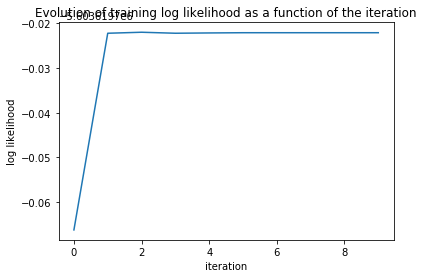

In [47]:
#Plot the evolution of training log likelihood (or ELBO) as a function of the iteration

#log likelihood over iterations for EM 
#find all log transition probabilities and sum them.

#question: is the iteration a sentence or a loop over all sentences?
#ELBO is variational lower bound on the likelihood

#ELBO = []
iteration= list(range(len(likelihood_list)))

plt.plot(iteration, likelihood_list)
plt.xlabel("iteration")
plt.ylabel('log likelihood')
plt.title('Evolution of training log likelihood as a function of the iteration')
plt.savefig("EM_IBM1.png")
plt.show()


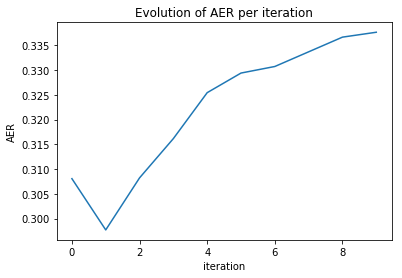

In [126]:
AER = [0.3080660835762876,0.2977250247279921,0.3082259663032706,0.31615460852329036,0.32542037586547967,0.3293768545994066,0.3307008884501481,0.33366238894373146,0.3366238894373149,0.3376110562685094]
iteration= list(range(len(AER)))
plt.plot(iteration, AER)
plt.xlabel("iteration")
plt.ylabel('AER')
plt.title('IBM1 with EM training: evolution of AER per iteration')
plt.savefig("EM_IBM1_AER.png")
plt.show()

In [138]:
test_e = 'testing/test/test.e'
test_f = 'testing/test/test.f'

with open(test_e) as e:
    test_sentences_e = [null + l.split() for l in e.readlines()]
with open(test_f) as f:
    test_sentences_f = [l.split() for l in f.readlines()]

num_test_sentences = len(test_sentences_e)
print(num_test_sentences)

447


In [143]:
#Decoding with IBM model 1
#we try to find the most probable alignment given the translation 
#probabilities that were trained with the EM steps
#for each word in a sentence, find highest t

def write_test_naacl(filename):

    naaclfile = open(filename,"w") 

    for sent in range(num_test_sentences):
        sent_e = test_sentences_e[sent]
        sent_f = test_sentences_f[sent]


        l = len(sent_e) #includes null
        m = len(sent_f)

        for f in range(m):
            best_prob = 0
            best_j = 0
            for e in range(l):
                if t[sent_f[f].lower()][sent_e[e].lower()] > best_prob:
                    best_prob = t[sent_f[f].lower()][sent_e[e].lower()]
                    best_j = e
            if best_j != 0:
                naaclfile.write(str(sent+1) + " " + str(best_j) + " " + str(f+1) + " S" + "\n")
#             print(sent_f[f],sent_e[best_j],f+1,best_j)

    naaclfile.close()


In [150]:
filename = 'transprobs_9.pickle'
with open(filename, 'rb') as f:
    t = dill.load(f)

In [151]:
newfilename = 'naacl-test' + filename.strip('.pickle')
write_test_naacl(newfilename)

2 2 1 1
. . 2 2
2 2 1 1
. . 2 2
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
oh oh 1 1
, , 2 2
oh oh 3 1
! ! 4 4
souvenons remember 1 3
- let 2 1
nous us 3 2
, , 4 4
monsieur Speaker 5 6
le the 6 15
Orateur segments 7 10
, , 8 4
que that 9 8
ce these 10 9
sont these 11 9
ces these 12 9
secteurs segments 13 10
de of 14 11
notre our 15 12
société society 16 13
qui that 17 8
servent segments 18 10
de of 19 11
épine backbone 20 16
dorsale backbone 21 16
à our 22 12
notre our 23 12
économie economy 24 19
. . 25 20
bravo hear 1 1
! ! 2 4
bravo hear 1 1
! ! 2 4
monsieur Speaker 1 2
le the 2 9
Orateur directed 3 7
, , 4 3
ma my 5 4
question question 6 5
se question 7 5
adresse question 8 5
à to 9 8
le the 10 9
ministre Minister 11 10
chargé directed 12 7
de of 13 11
les Transport 14 12
transports Transport 15 12
. . 16 13
tous both 1 1
deux both 2 1
possèdent manufacture 3 8
de of 4 11
nombreuses many 5 3
années years 6 4
de of 7 11
expérience experience 8 5
dans in 

il be 9 9
faudrait should 10 8
se concerned 11 10
inquiéter concerned 12 10
pour concerned 13 10
le the 14 4
instant lines 15 5
. . 16 15
le the 1 4
député member 2 6
a allowed 3 3
pu supplementaries 4 8
poser supplementaries 5 8
deux two 6 7
questions supplementaries 7 8
supplémentaires supplementaries 8 8
et and 9 9
, in 10 10
en in 11 10
toute supplementaries 12 8
justice fairness 13 11
, in 14 10
je i 15 1
pense think 16 13
que think 17 13
nous we 18 14
devrions should 19 15
laisser supplementaries 20 8
la the 21 4
parole supplementaries 22 8
à to 23 17
de 0NULL 24 0
autres other 25 19
députés members 26 21
. . 27 22
je i 1 1
crois think 2 2
que that 3 3
ce is 4 4
est is 5 4
une good 6 5
bonne good 7 5
chose good 8 5
. . 9 6
je i 1 1
crois think 2 2
que that 3 3
il taken 4 6
a has 5 22
pris taken 6 6
trop too 7 24
de of 8 13
temps time 9 5
à in 10 7
étudier pipeline 11 17
de of 12 13
les of 13 13
demandes applications 14 10
courantes routine 15 9
de of 16 13
changements changes 17 

( ( 7 6
ministre Minister 8 7
de of 9 8
les Finance 10 9
Finances Finance 11 9
) ) 12 10
propose moved 13 11
: : 14 12
bien good 1 13
que as 2 1
il there 3 10
me I 4 4
coûte -- 5 23
de 0NULL 6 0
le 0NULL 7 0
admettre admit 8 7
, , 9 9
les governments 10 19
gouvernements governments 11 19
libéraux Liberal 12 18
à to 13 6
le 0NULL 14 0
Canada country 15 22
ont been 16 12
présenté brought 17 15
de 0NULL 18 0
bonnes good 19 13
mesures -- 20 23
législatives -- 21 23
... -- 22 23
en as 1 1
tant as 2 1
que as 3 1
député member 4 3
de of 5 12
une hard 6 16
circonscription riding 7 7
voisine neighbouring 8 6
, as 9 1
je I 10 8
connais persistence 11 14
fort hard 12 16
bien well 13 10
sa his 14 13
persévérance persistence 15 14
et and 16 15
son his 17 13
acharnement persistence 18 14
à for 19 4
le the 20 2
travail work 21 17
. . 22 18
où where 1 1
est is 2 2
la AIB 3 4
CAI AIB 4 4
? ? 5 5
malheureusement unfortunately 1 8
, , 2 4
à at 3 1
le the 4 2
heure moment 5 3
actuelle moment 6 3
, , 7 4
c

une they 6 3
mesure applauding 7 5
qui against 8 9
aurait applauding 9 5
garanti applauding 10 5
à against 11 9
les are 12 4
Canadiens applauding 13 5
de of 14 11
les are 15 4
approvisionnements applauding 16 5
sûrs applauding 17 5
. . 18 13
a reminded 1 8
propos reminded 2 8
de of 3 9
contribution contributions 4 4
, , 5 5
cela am 6 7
me I 7 6
rappelle reminded 8 8
une a 9 10
histoire story 10 11
. . 11 12
madame madam 1 1
le the 2 10
Président Speaker 3 2
, , 4 3
je I 5 4
aimerais like 6 6
entendre hear 7 8
ce hear 8 8
que would 9 5
va move 10 15
dire hear 11 8
le the 12 10
député member 13 12
avant before 14 13
de from 15 9
proposer move 16 15
ma my 17 16
motion motion 18 17
. . 19 18
le the 1 1
orateur preparations 2 15
qui involved 3 13
me preparations 4 15
a mentioned 5 5
précédé preparations 6 15
a mentioned 7 5
dit mentioned 8 5
également also 9 4
que would 10 7
il involved 11 13
aimerait preparations 12 15
voir preparations 13 15
les have 14 10
provinces provinces 15 12
partic

nous we 1 1
avons we 2 1
permis allowed 3 3
à to 4 9
un a 5 4
sous subgovernment 6 5
- subgovernment 7 5
gouvernement subgovernment 8 5
de of 9 15
arracher subgovernment 10 5
de of 11 15
les have 12 2
pouvoirs subgovernment 13 5
à to 14 9
la House 15 14
Chambre House 16 14
de of 17 15
les have 18 2
communes Commons 19 16
. . 20 17
ce is 1 2
est is 2 2
une that 3 1
somme substantial 4 4
considérable substantial 5 4
. . 6 5
que what 1 1
se going 2 4
passe going 3 4
il there 4 7
exactement exactly 5 2
? ? 6 8
madame madam 1 1
le 0NULL 2 0
Président Speaker 3 2
, , 4 3
je I 5 4
serai brief 6 8
très very 7 7
bref brief 8 8
. . 9 9
le the 1 5
gouvernement Government 2 2
dit tells 3 4
tout simply 4 3
simplement simply 5 3
à for 6 10
les them 7 11
gens people 8 6
ce what 9 7
qui that 10 1
est is 11 8
bon good 12 9
pour for 13 10
eux them 14 11
. . 15 12
ce is 1 2
sont are 2 15
les are 3 15
données figures 4 6
désaisonnalisés .5 5 10
, drop 6 13
celles .5 7 10
qui which 8 7
montrent .5 9 10
une

se happening 19 17
est has 20 15
passé alerting 21 4
. . 22 18
Évidemment course 1 8
, , 2 6
quand Conservatives 3 2
les are 4 17
conservateurs Conservatives 5 2
étaient Conservatives 6 2
dans in 7 4
le the 8 1
opposition Opposition 9 5
, , 10 6
ils they 11 16
tenaient Conservatives 12 2
de of 13 7
les are 14 17
discours what 15 15
qui what 16 15
étaient Conservatives 17 2
à to 18 14
le the 19 1
opposé Conservatives 20 2
de of 21 7
leurs they 22 16
actions Conservatives 23 2
de of 24 7
aujourd' now 25 19
hui now 26 19
. . 27 20
en fact 1 4
réalité fact 2 4
, , 3 5
le the 4 7
ministre Minister 5 8
de of 6 3
la Justice 7 10
Justice Justice 8 10
et and 9 11
le the 10 7
solliciteur Solicitor 11 13
général General 12 14
ont have 13 15
répondu responded 14 16
avec have 15 15
tous both 16 6
les have 17 15
détails beings 18 22
que as 19 19
ils have 20 15
pouvaient beings 21 22
humainement beings 22 22
donner fully 23 17
. . 24 24
le the 1 2
vice Deputy 2 3
- Deputy 3 3
premier Prime 4 4
minist

les have 11 21
entreprises operations 12 19
que what 13 10
ils they 14 1
auront duplication 15 16
achetées duplication 16 16
feront duplication 17 16
double duplication 18 16
emploi duplication 19 16
avec what 20 10
de of 21 7
autres other 22 18
que what 23 10
ils they 24 1
ont have 25 21
déjà have 26 21
. . 27 22
ce is 1 2
est is 2 2
à at 3 3
la Court 4 12
deuxième second 5 5
étape stage 6 6
de of 7 7
réexamen compulsory 8 19
que that 9 9
la Court 10 12
Cour Court 11 12
suprême Supreme 12 11
a has 13 13
établi ruled 14 14
que that 15 9
une a 16 16
audience hearing 17 17
est is 18 2
obligatoire compulsory 19 19
. . 20 20
en in 1 5
ce upon 2 12
qui matters 3 7
concerne penalize 4 15
les them 5 16
avocats lawyers 6 3
spécialisés specialized 7 4
en in 8 5
immigration immigration 9 6
, , 10 8
le the 11 9
barreau Bar 12 10
se itself 13 13
charge specialized 14 4
de 0NULL 15 0
les them 16 16
pénaliser penalize 17 15
. . 18 17
le the 1 1
autre alternative 2 2
solution alternative 3 2
consiste

nous we 3 3
demeurons size 4 15
un a 5 5
petit small 6 6
pays nation 7 7
et and 8 8
nous we 9 3
sommes we 10 3
vulnérables vulnerable 11 11
pour are 12 4
cette size 13 15
raison because 14 12
. . 15 16
m. Wyman 1 2
Wyman Wyman 2 2
compte Wyman 3 2
de of 4 6
nombreuses Wyman 5 2
années years 6 5
de of 7 6
expérience experience 8 7
dans in 9 8
le the 10 9
secteur sector 11 12
de of 12 6
les of 13 6
marchés Wyman 14 2
financiers financial 15 10
. . 16 13
réfléchissons 's 1 2
- let 2 1
y think 3 3
un a 4 8
petit 's 5 2
instant moment 6 9
. . 7 10
il things 1 17
est do 2 2
inutile bush 3 10
, any 4 11
je i 5 1
crois think 6 4
, any 7 11
de about 8 13
continuer beat 9 7
à to 10 15
tourner bush 11 10
autour around 12 8
de about 13 13
le the 14 9
pot bush 15 10
pour to 16 15
régler bush 17 10
la the 18 9
question about 19 13
. . 20 19
cette piece 1 13
façon resource 2 4
de of 3 14
procéder helps 4 7
permet helps 5 7
à to 6 10
les Indian 7 8
Indiens Indian 8 8
de of 9 14
participer piece 10 13


que that 1 6
feront capital 2 7
- ? 3 8
ils they 4 3
avec with 5 5
ce what 6 1
capital capital 7 7
? ? 8 8
cela Canadair 1 12
équivaut Canadair 2 12
à to 3 5
peu roughly 4 3
près roughly 5 3
à to 6 5
les to 7 5
440 440 8 8
millions million 9 9
de 0NULL 10 0
dollars $ 11 7
versés paid 12 10
à to 13 5
Canadair Canadair 14 12
en in 15 13
le the 16 6
espace Canadair 17 12
de 0NULL 18 0
deux two 19 14
ans years 20 15
. . 21 16
il it 1 5
est became 2 6
ressorti gains 3 14
de from 4 1
ces these 5 2
audiences hearings 6 3
que that 7 8
la the 8 9
grande major 9 10
préoccupation concern 10 11
était was 11 12
les 0NULL 12 0
gains gains 13 14
en gains 14 14
capital capital 15 13
. . 16 15
il it 1 1
donne indicates 2 2
à to 3 3
entendre indicates 4 2
à to 5 3
les them 6 16
particuliers individual 7 4
que that 8 6
pendant long 9 9
de 0NULL 10 0
trop too 11 8
nombreuses indicates 12 2
années long 13 9
le 0NULL 14 0
gouvernement Government 15 10
a has 16 11
décidé indicates 17 2
pour for 18 7
eux them

intérêt interest 14 10
augmentaient homeowners 15 5
. . 16 14
notre our 1 1
rôle role 2 3
sur international 3 2
la international 4 2
scène collapsed 5 6
internationale international 6 2
est has 7 4
quelque somehow 8 5
peu collapsed 9 6
éclipsé collapsed 10 6
. . 11 7
en put 1 15
ce have 2 23
qui up 3 16
concerne crop 4 8
le the 5 11
assurance insurance 6 9
- insurance 7 9
récolte crop 8 8
, , 9 3
par instance 10 2
exemple instance 11 2
, , 12 3
le the 13 11
gouvernement Government 14 13
fédéral federal 15 12
a has 16 14
contribué crop 17 8
la the 18 11
moitié half 19 17
de 0NULL 20 0
les have 21 23
primes premiums 22 19
et and 23 20
les have 24 23
producteurs producers 25 22
le the 26 11
autre other 27 27
moitié half 28 17
. . 29 29
donc so 1 1
, in 2 5
il think 3 4
est terms 4 7
impossible cannot 5 3
pour so 6 1
nous we 7 2
de 0NULL 8 0
penser think 9 4
en in 10 5
ces those 11 6
termes terms 12 7
. . 13 8
elle Candu 1 10
a has 2 3
déclaré said 3 4
que that 4 5
le the 5 1
seul only 6 7

Canada canada 2 1
a record 3 7
tout serve 4 13
lieu tolerance 5 18
de of 6 5
être be 7 3
fier proud 8 4
de of 9 5
son its 10 6
bilan record 11 7
dans its 12 6
ce proud 13 4
domaine record 14 7
et and 15 11
devrait should 16 12
servir serve 17 13
de of 18 5
modèle example 19 16
de of 20 5
tolérance tolerance 21 18
pour to 22 19
les rights 23 10
autres other 24 20
pays countries 25 21
. . 26 22
sur advice 1 2
le 0NULL 2 0
avis advice 3 2
de 0NULL 4 0
qui whose 5 1
a did 6 3
il he 7 4
pris did 8 3
cette that 9 12
décision decision 10 9
, , 11 10
puisque rejected 12 15
ses his 13 8
services rejected 14 15
avaient did 15 3
refusé rejected 16 15
? ? 17 17
monsieur Speaker 1 2
le the 2 8
Président Speaker 3 2
, , 4 3
je I 5 4
suis am 6 5
heureuse pleased 7 6
que that 8 7
le the 9 8
premier Prime 10 9
ministre Minister 11 10
ait pleased 12 6
fourni provided 13 12
ces information 14 14
informations information 15 14
à in 16 15
la House 17 17
Chambre House 18 17
. . 19 18
je I 1 2
prie displays 